EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ïò§Î•ò Í≤ΩÍ≥† Î¨¥ÏãúÌïòÍ∏∞
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('./data/online_retail_customer_churn.csv').drop(columns=['Customer_ID'])
df

Age  Gender  Annual_Income  Total_Spend  Years_as_Customer  \
0     62   Other          45.15      5892.58                  5   
1     65    Male          79.51      9025.47                 13   
2     18    Male          29.19       618.83                 13   
3     21   Other          79.63      9110.30                  3   
4     21   Other          77.66      5390.88                 15   
..   ...     ...            ...          ...                ...   
995   54    Male         143.72      1089.09                  2   
996   19    Male         164.19      3700.24                  9   
997   47  Female         113.31       705.85                 17   
998   23    Male          72.98      3891.60                  7   
999   34   Other         134.86      3956.71                 15   

     Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
0                  22                      453.80               2   
1                  77                       22.90               2   
2                  71                       50.53               5   
3                  33                      411.83               5   
4                  43                      101.19               3   
..                ...                         ...             ...   
995                29                       77.75               0   
996                90                       34.45               6   
997                69                      187.37               7   
998                31                      483.80               1   
999                48                      420.91               6   

     Num_of_Support_Contacts  Satisfaction_Score  Last_Purchase_Days_Ago  \
0                          0                   3                     129   
1                          2                   3                     227   
2                          2                   2                     283   
3                          3                   5                     226   
4                          0                   5                     242   
..                       ...                 ...                     ...   
995                        3                   2                      88   
996                        4                   4                     352   
997                        3                   1                     172   
998                        2                   5                      55   
999                        0                   1                     269   

     Email_Opt_In Promotion_Response  Target_Churn  
0            True          Responded          True  
1           False          Responded         False  
2           False          Responded          True  
3            True            Ignored          True  
4           False       Unsubscribed         False  
..            ...                ...           ...  
995          True            Ignored         False  
996         False          Responded          True  
997          True       Unsubscribed         False  
998         False          Responded          True  
999          True            Ignored          True  

[1000 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   int64  
 1   Gender                      1000 non-null   object 
 2   Annual_Income               1000 non-null   float64
 3   Total_Spend                 1000 non-null   float64
 4   Years_as_Customer           1000 non-null   int64  
 5   Num_of_Purchases            1000 non-null   int64  
 6   Average_Transaction_Amount  1000 non-null   float64
 7   Num_of_Returns              1000 non-null   int64  
 8   Num_of_Support_Contacts     1000 non-null   int64  
 9   Satisfaction_Score          1000 non-null   int64  
 10  Last_Purchase_Days_Ago      1000 non-null   int64  
 11  Email_Opt_In                1000 non-null   bool   
 12  Promotion_Response          1000 non-null   object 
 13  Target_Churn                1000 n

In [4]:
df.describe()

Age  Annual_Income  Total_Spend  Years_as_Customer  \
count  1000.000000    1000.000000   1000.00000        1000.000000   
mean     43.267000     111.962960   5080.79265           9.727000   
std      15.242311      52.844111   2862.12335           5.536346   
min      18.000000      20.010000    108.94000           1.000000   
25%      30.000000      67.800000   2678.67500           5.000000   
50%      43.000000     114.140000   4986.19500           9.000000   
75%      56.000000     158.452500   7606.47000          14.000000   
max      69.000000     199.730000   9999.64000          19.000000   

       Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
count       1000.000000                 1000.000000     1000.000000   
mean          49.456000                  266.876530        4.612000   
std           28.543595                  145.873445        2.896869   
min            1.000000                   10.460000        0.000000   
25%           25.000000                  139.682500        2.000000   
50%           49.000000                  270.100000        5.000000   
75%           74.000000                  401.602500        7.000000   
max           99.000000                  499.570000        9.000000   

       Num_of_Support_Contacts  Satisfaction_Score  Last_Purchase_Days_Ago  
count              1000.000000         1000.000000             1000.000000  
mean                  1.934000            2.974000              182.890000  
std                   1.402716            1.391855              104.391319  
min                   0.000000            1.000000                1.000000  
25%                   1.000000            2.000000               93.000000  
50%                   2.000000            3.000000              180.500000  
75%                   3.000000            4.000000              274.000000  
max                   4.000000            5.000000              364.000000

In [5]:
df['Target_Churn'].value_counts()

Target_Churn
True     526
False    474
Name: count, dtype: int64

In [6]:
df['Gender'].value_counts()

Gender
Female    342
Male      334
Other     324
Name: count, dtype: int64

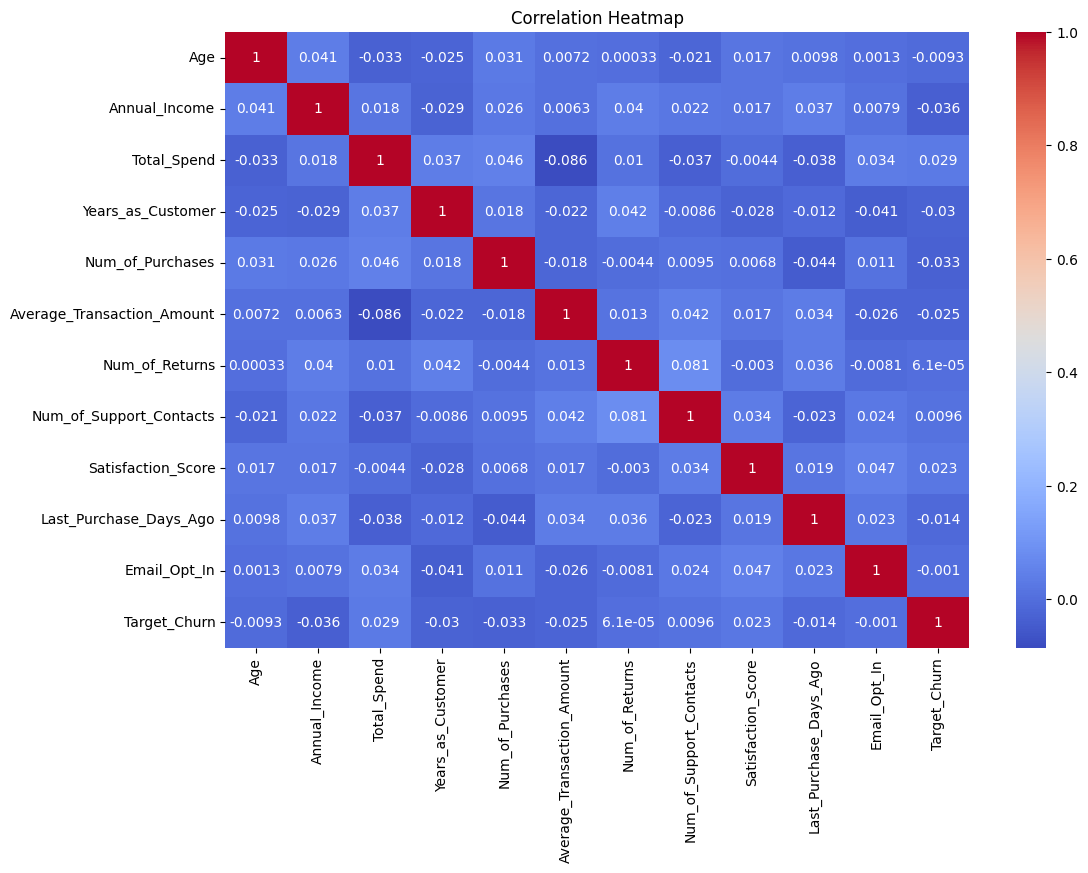

In [7]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# ÏàòÏπòÌòï Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï†ÑÎ∂Ä |r| < 0.5 -> ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÏóÜÏùå, ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ, drop ÏïàÌï¥ÎèÑ Îê† ÎìØ?


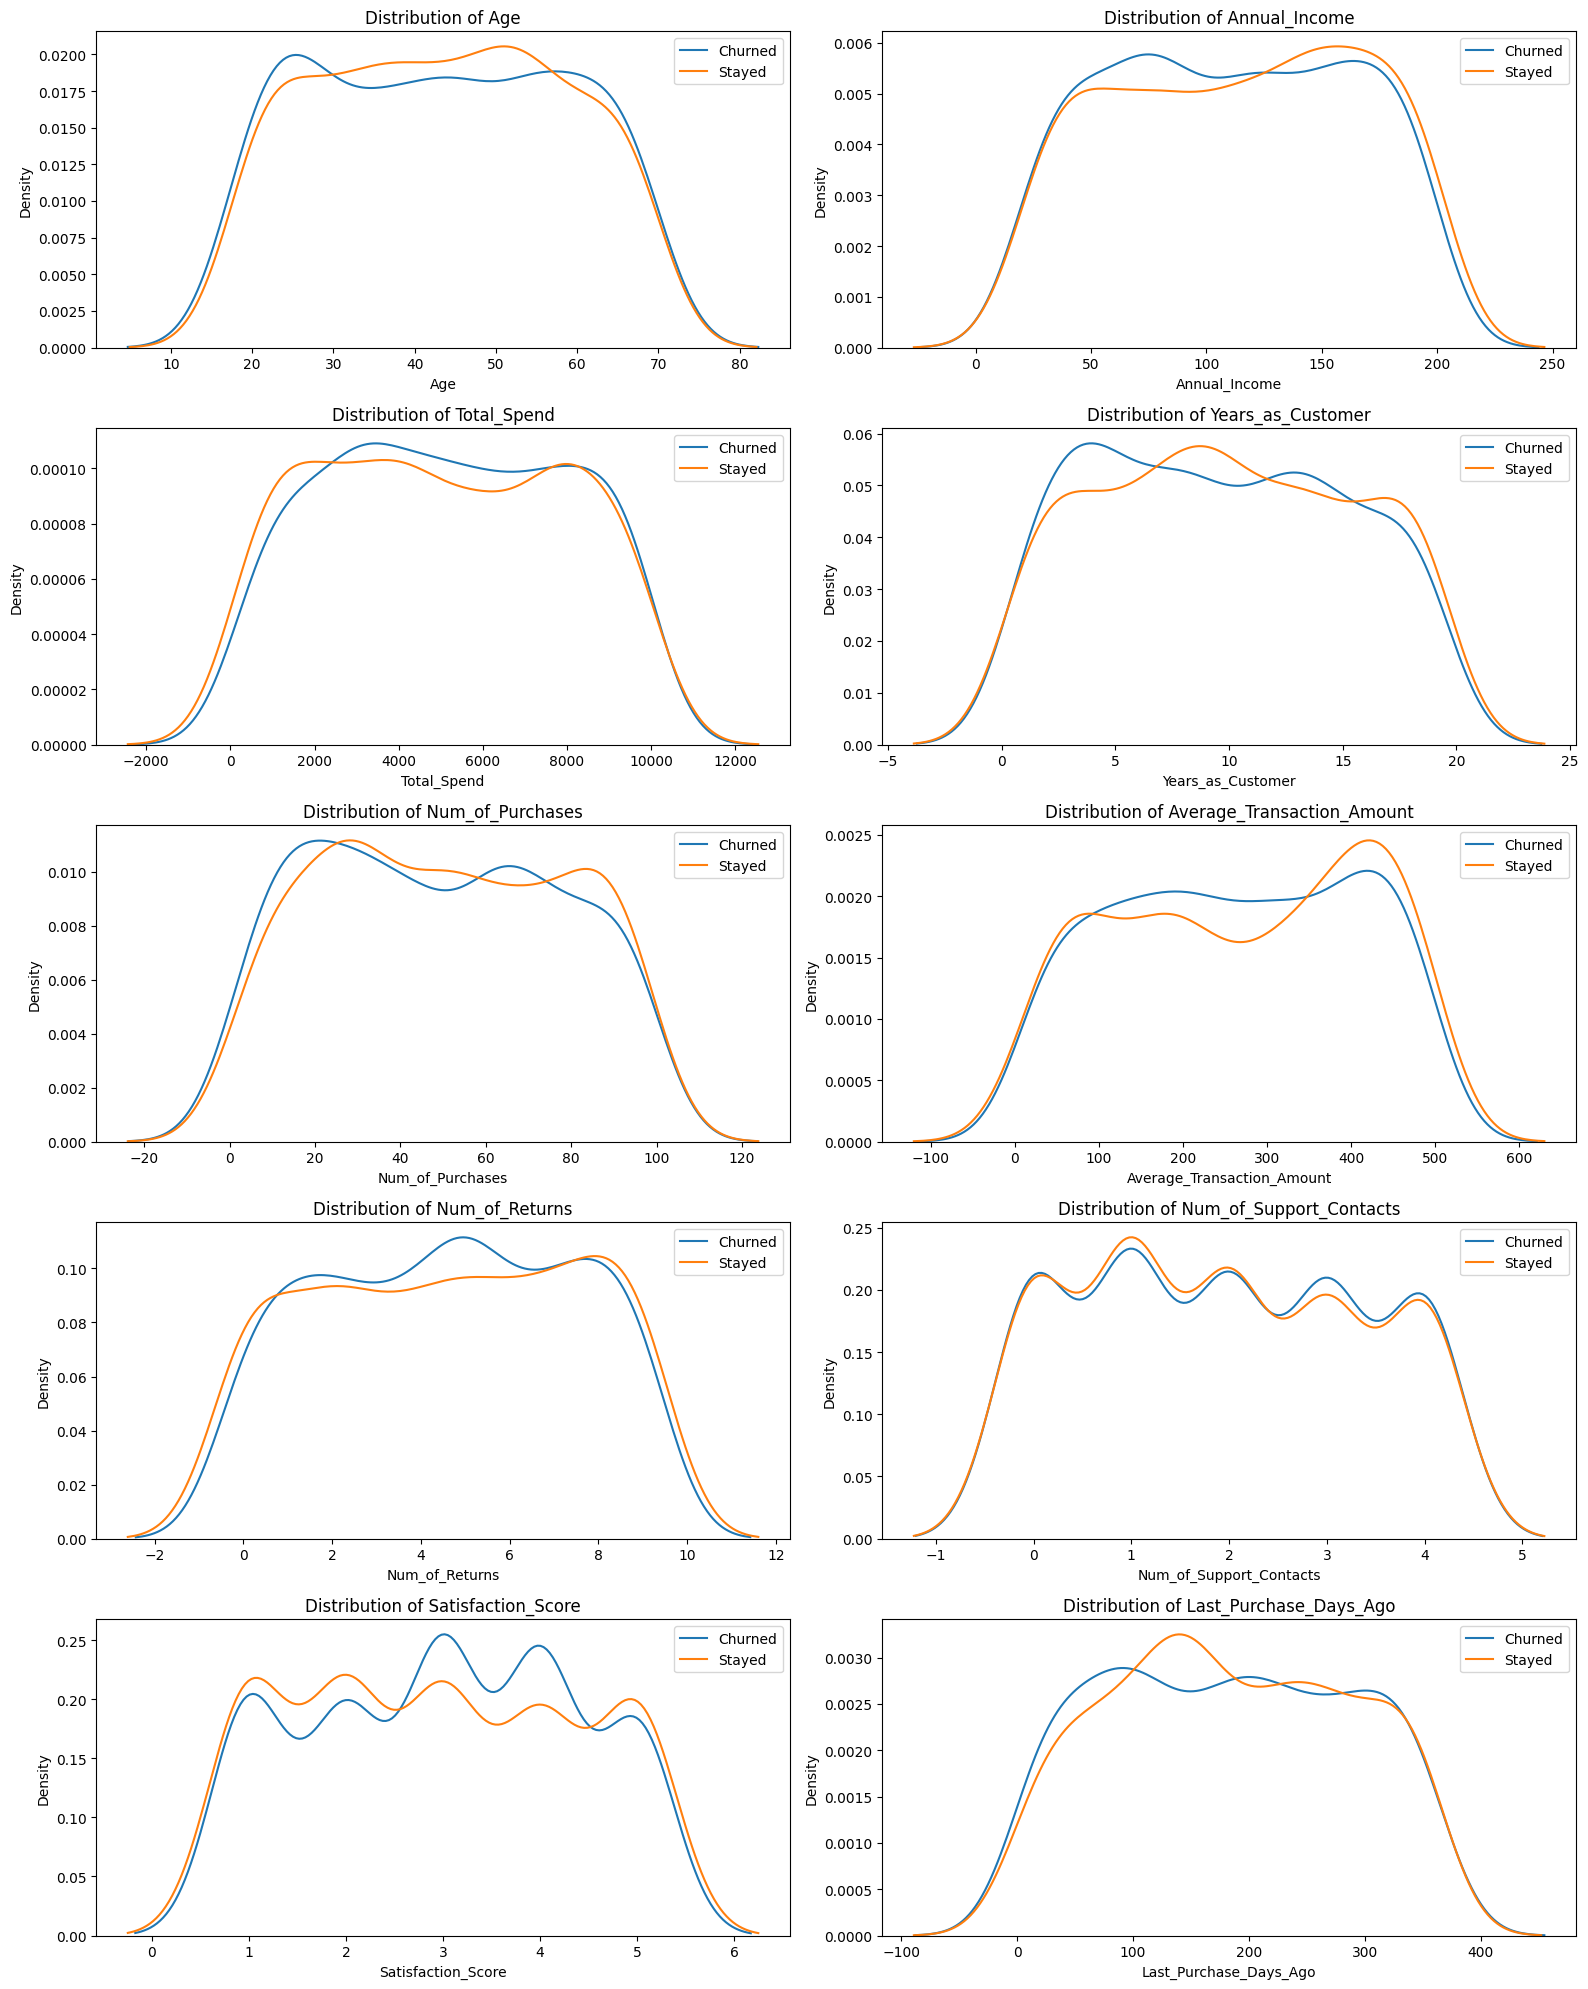

In [8]:
# ÏàòÏπòÌòï Î≥ÄÏàò Ï§ë Ïù¥ÌÉà Ïó¨Î∂ÄÎ≥Ñ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
# ÏàòÏπòÌòï Ïª¨Îüº Î¶¨Ïä§Ìä∏ (ÏãùÎ≥ÑÏûê Î∞è ÌÉÄÍ≤ü Ï†úÏô∏)
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# subplot Î∞∞Ïπò ÏÑ§Ï†ï
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols
plt.figure(figsize=(16, 4 * n_rows))

# Í∞Å ÏàòÏπòÌòï Ïª¨ÎüºÏóê ÎåÄÌï¥ Ïù¥ÌÉà Ïó¨Î∂ÄÎ≥Ñ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Ïù¥ÌÉà Ïó¨Î∂ÄÎ≥Ñ KDE plot
    for churned, label in zip([True, False], ["Churned", "Stayed"]):
        subset = df[df["Target_Churn"] == churned]
        sns.kdeplot(subset[col], label=label)
    
    plt.title(f"Distribution of {col}")
    plt.legend()

plt.tight_layout()
plt.show()


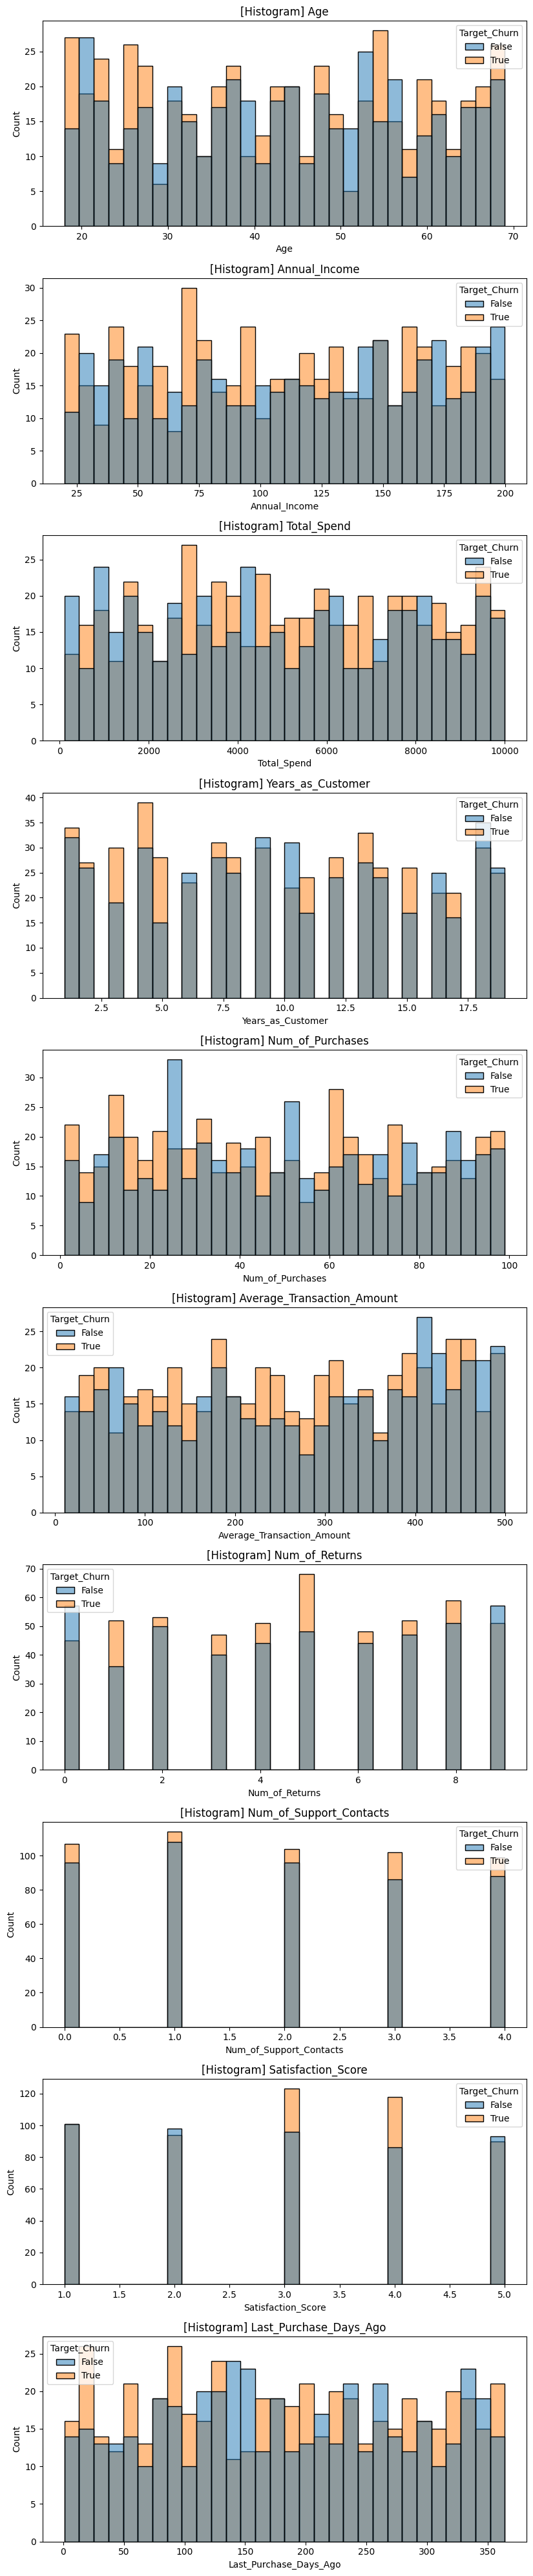

In [9]:
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# 1. ÌûàÏä§ÌÜ†Í∑∏Îû® (Ïù¥ÌÉà Ïó¨Î∂Ä Î≥ÑÎèÑ ÏÉâÏÉÅ)
def plot_histograms():
    plt.figure(figsize=(16, 4 * len(numeric_cols)))
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols), 2, 2 * i + 1)
        sns.histplot(data=df, x=col, hue="Target_Churn", kde=False, bins=30)
        plt.title(f"[Histogram] {col}")
    plt.tight_layout()
    plt.show()

# 2. Î∞ïÏä§ÌîåÎ°Ø (Ïù¥ÌÉà Ïó¨Î∂ÄÎ≥Ñ ÎπÑÍµê)
def plot_boxplots():
    plt.figure(figsize=(16, 4 * len(numeric_cols)))
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols), 2, 2 * i + 1)
        sns.boxplot(x="Target_Churn", y=col, data=df)
        plt.title(f"[Boxplot] {col}")
    plt.tight_layout()
    plt.show()

# 3. Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø
def plot_violinplots():
    plt.figure(figsize=(16, 4 * len(numeric_cols)))
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols), 2, 2 * i + 1)
        sns.violinplot(x="Target_Churn", y=col, data=df, inner="box")
        plt.title(f"[Violinplot] {col}")
    plt.tight_layout()
    plt.show()

# ÏõêÌïòÎäî ÏãúÍ∞ÅÌôî Ìï®Ïàò Ìò∏Ï∂ú
plot_histograms()
# plot_boxplots()
# plot_violinplots()


In [10]:
import pandas as pd

#### Ïù¥ÏÉÅÏπò ÌôïÏù∏ ####

# ÏàòÏπòÌòï Ïª¨Îüº Î¶¨Ïä§Ìä∏ Ï†ïÏùò
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# Ïù¥ÏÉÅÏπò Í≥ÑÏÇ∞ Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
detailed_outlier_info = []

# Í∞Å Ïª¨ÎüºÎ≥ÑÎ°ú Ïù¥ÏÉÅÏπò Í≥ÑÏÇ∞
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    detailed_outlier_info.append({
        "Column": col,
        "Q1": round(q1, 3),
        "Q3": round(q3, 3),
        "IQR": round(iqr, 3),
        "Lower Bound": round(lower_bound, 3),
        "Upper Bound": round(upper_bound, 3),
        "Outlier Count": len(outliers)
    })

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†•
outlier_df = pd.DataFrame(detailed_outlier_info)
print(outlier_df.to_string(index=False))



                    Column       Q1       Q3      IQR  Lower Bound  Upper Bound  Outlier Count
                       Age   30.000   56.000   26.000       -9.000       95.000              0
             Annual_Income   67.800  158.452   90.652      -68.179      294.431              0
               Total_Spend 2678.675 7606.470 4927.795    -4713.018    14998.162              0
         Years_as_Customer    5.000   14.000    9.000       -8.500       27.500              0
          Num_of_Purchases   25.000   74.000   49.000      -48.500      147.500              0
Average_Transaction_Amount  139.682  401.602  261.920     -253.197      794.482              0
            Num_of_Returns    2.000    7.000    5.000       -5.500       14.500              0
   Num_of_Support_Contacts    1.000    3.000    2.000       -2.000        6.000              0
        Satisfaction_Score    2.000    4.000    2.000       -1.000        7.000              0
    Last_Purchase_Days_Ago   93.000  274.000  181.

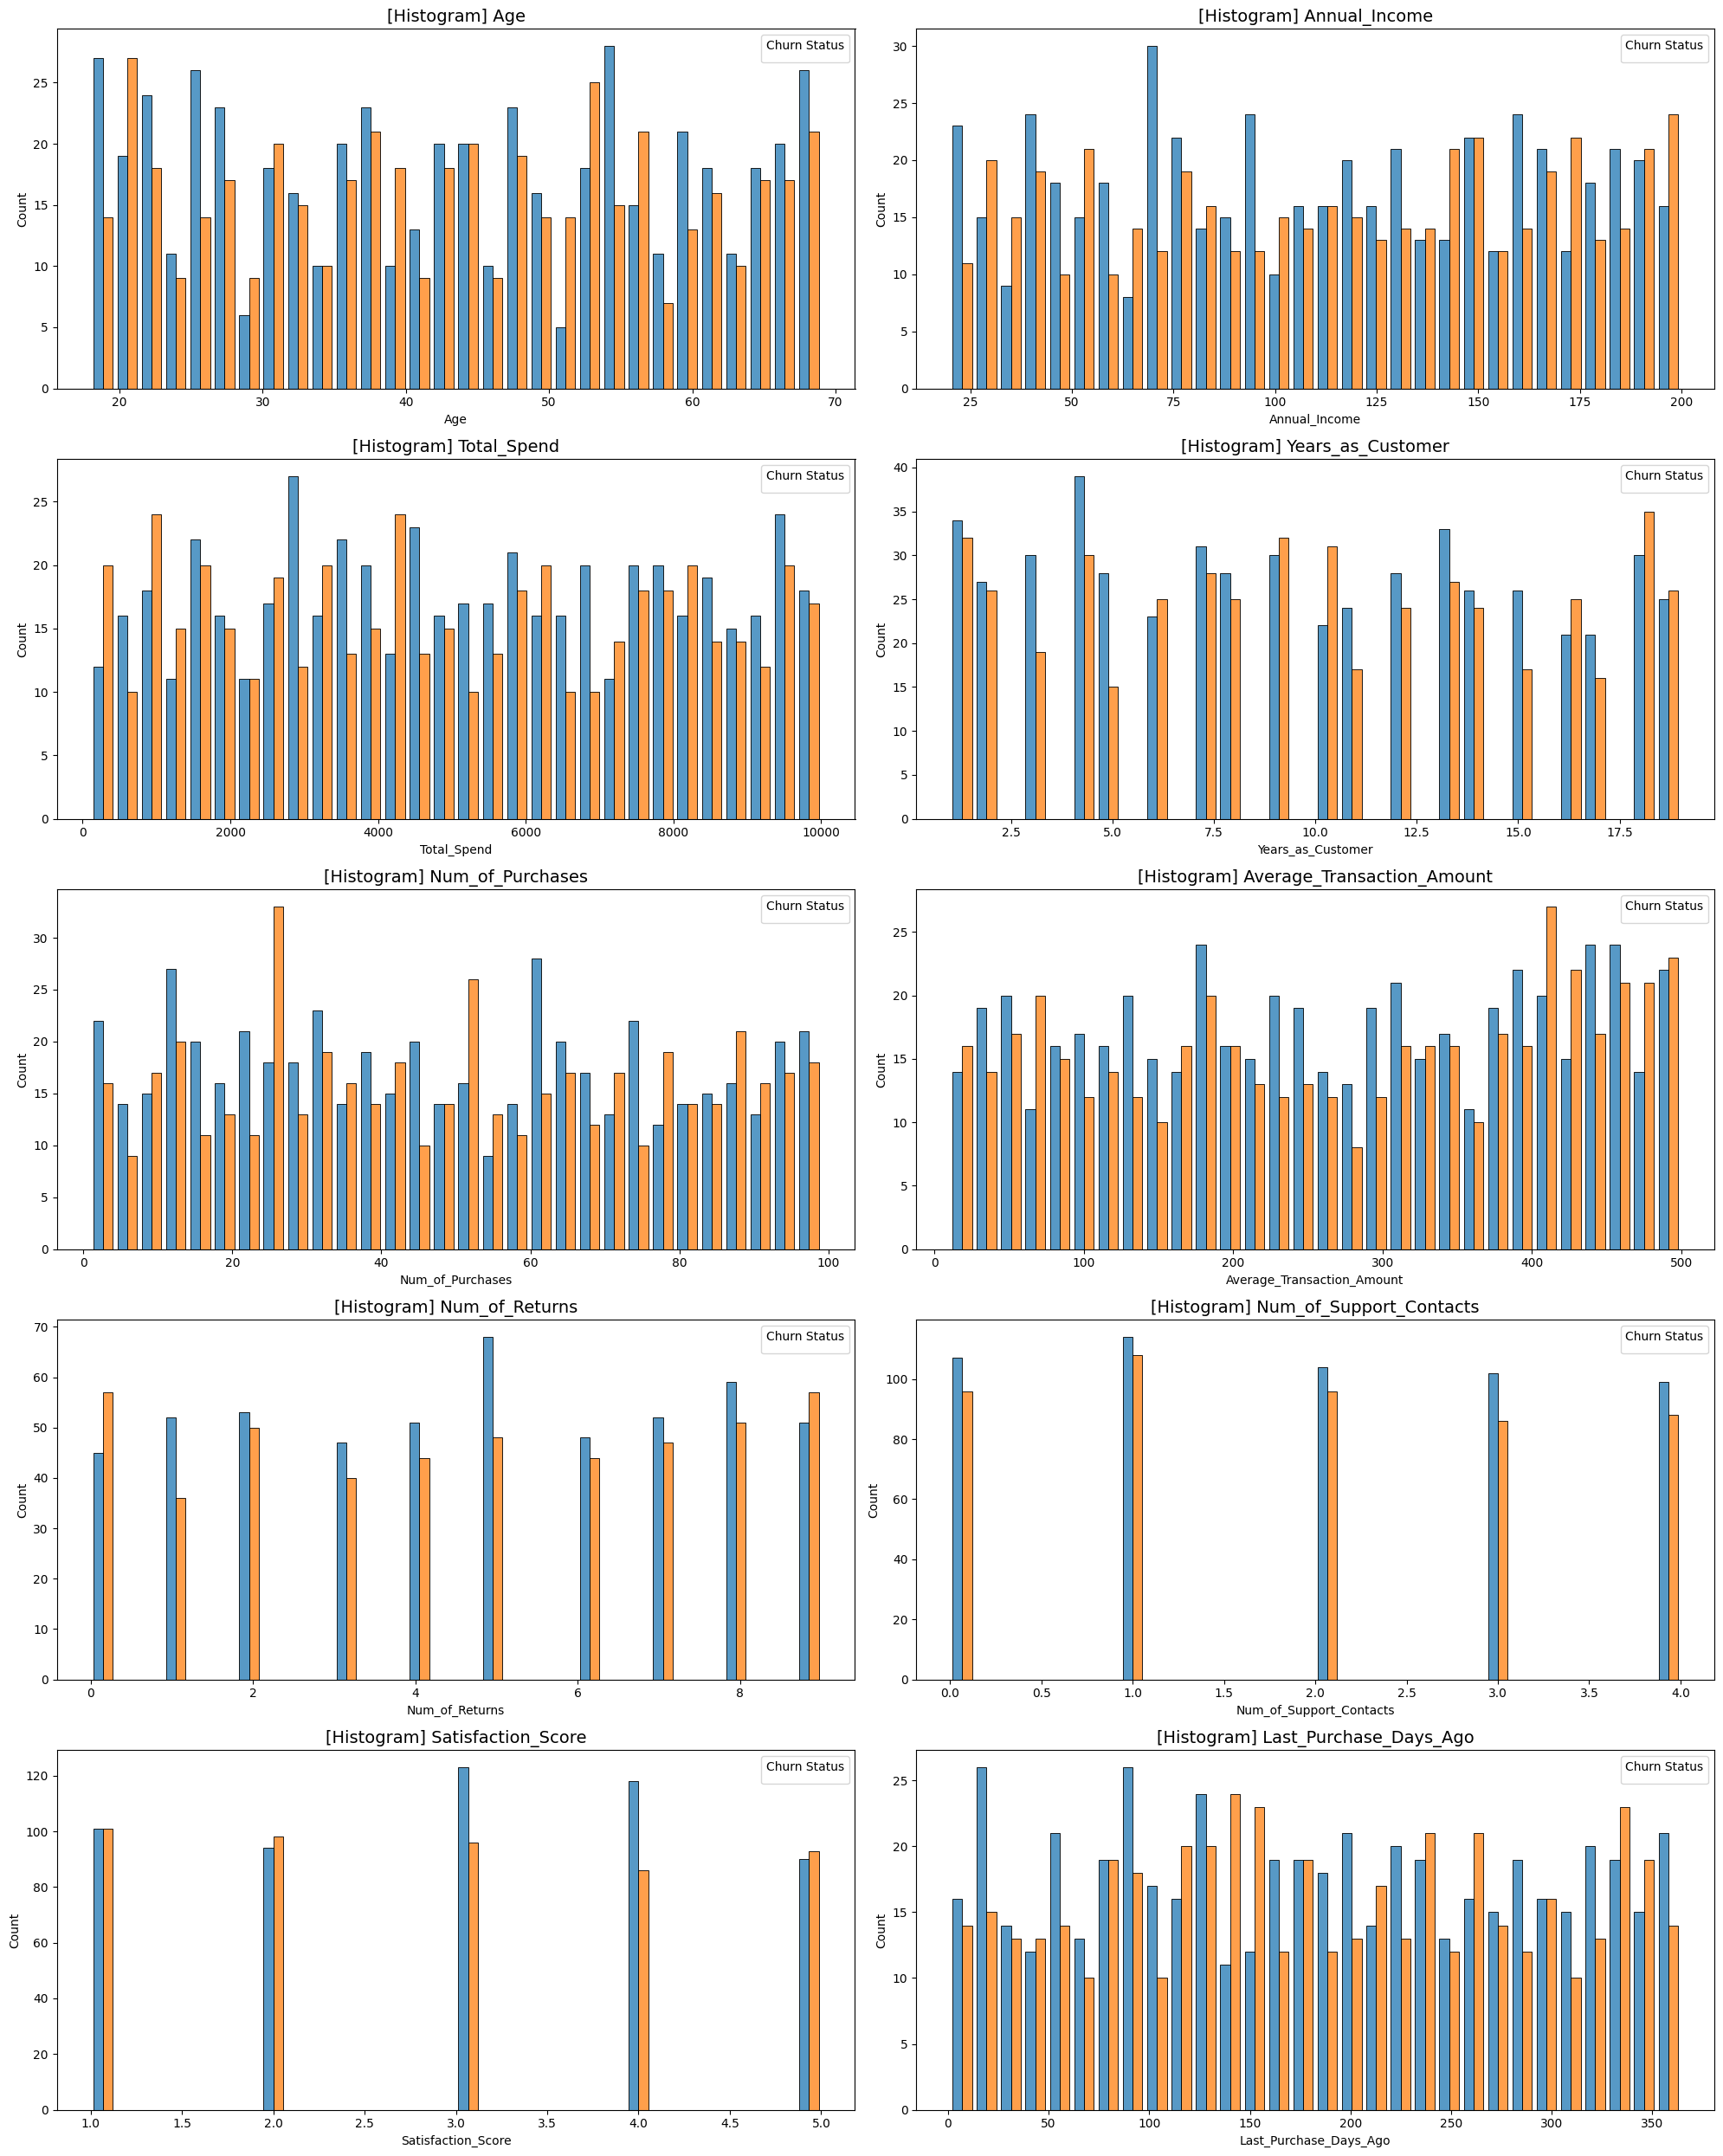

In [11]:
# ÏàòÏπòÌòï Î≥ÄÏàò Î™©Î°ù
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# Ïù¥ÌÉà Ïó¨Î∂ÄÎ•º Î¨∏ÏûêÏó¥ ÎùºÎ≤®Î°ú Î≥ÄÌôò (ÏãúÍ∞ÅÌôîÏóê Îçî Ï†ÅÌï©)
df["Churn_Status"] = df["Target_Churn"].map({True: "Churned", False: "Stayed"})

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols
plt.figure(figsize=(20, 5 * n_rows))  # ÌÅ¨Í∏∞ ÌÅ¨Í≤å ÏÑ§Ï†ï

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(
        data=df,
        x=col,
        hue="Churn_Status",
        bins=30,
        multiple="dodge",    # Í≤πÏπòÏßÄ ÏïäÍ≤å
        shrink=0.8,          # ÎßâÎåÄ ÎÑàÎπÑ Ï§ÑÏù¥Í∏∞
        legend="full"        # Î≤îÎ°Ä ÌôïÏã§Ìûà Ï∂úÎ†•
    )
    plt.title(f"[Histogram] {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Churn Status")  # Î≤îÎ°Ä Ï†úÎ™© Î™ÖÏãú

plt.tight_layout()
plt.show()


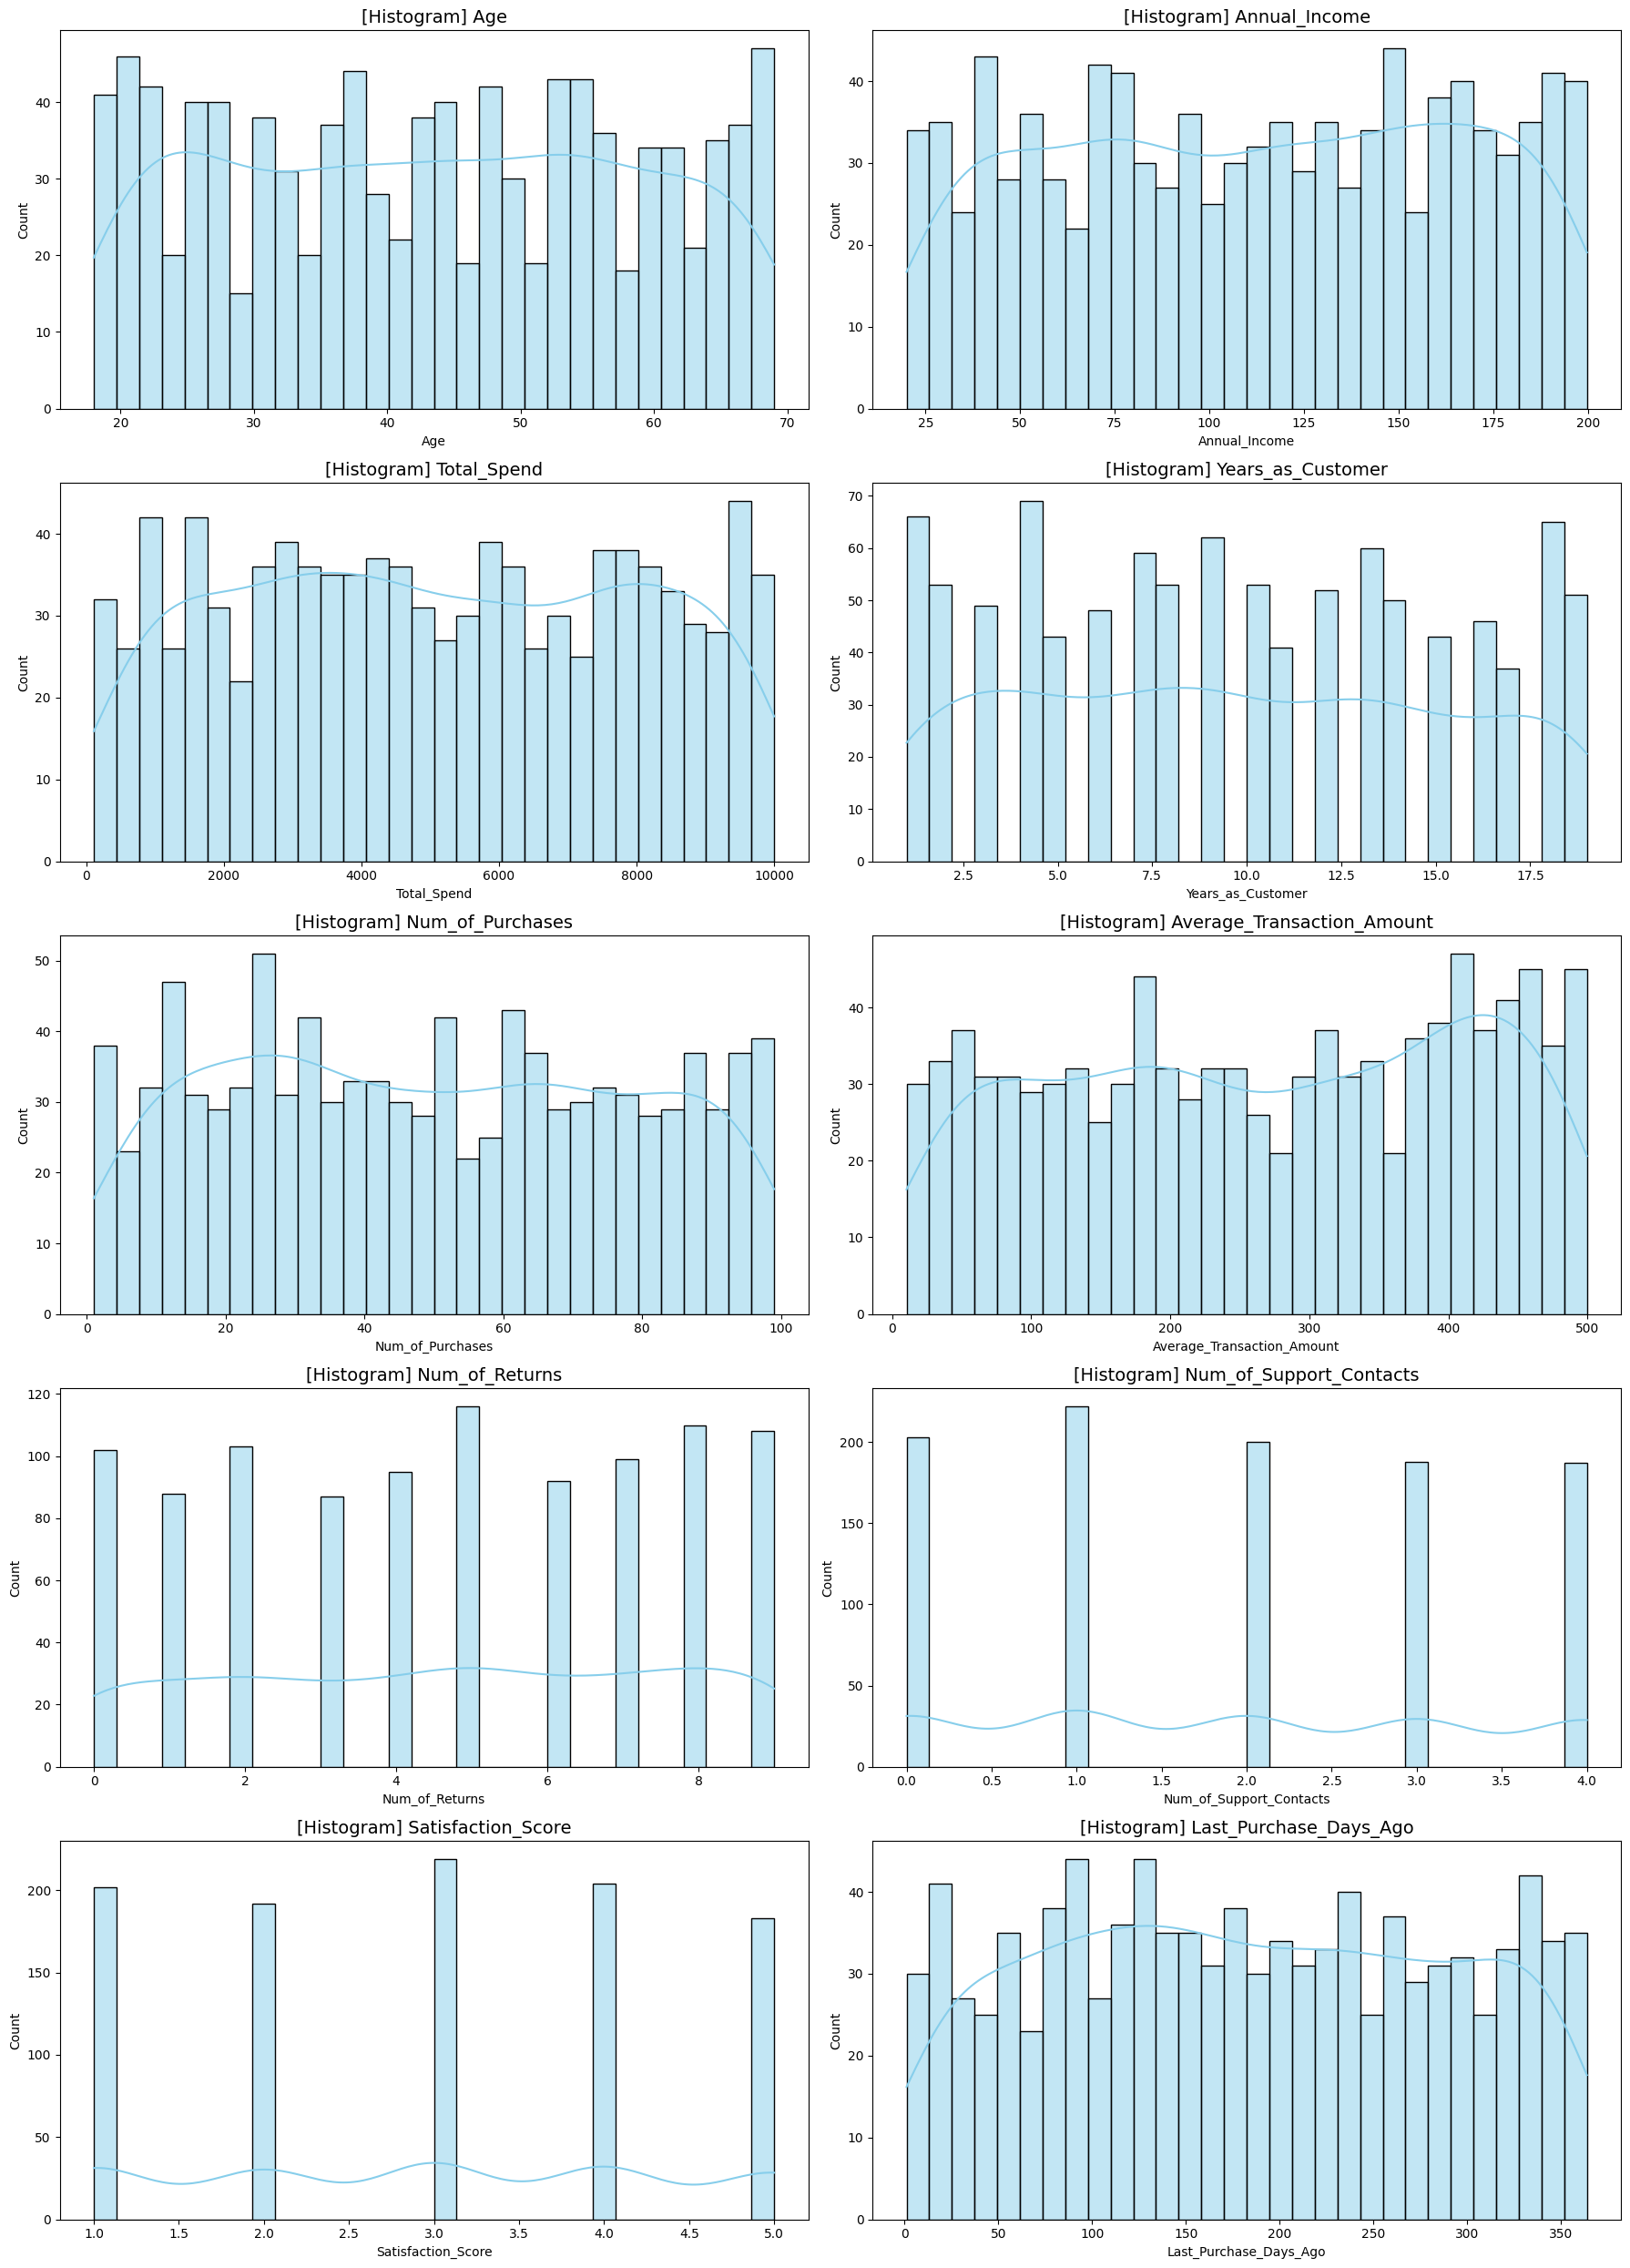

In [12]:
# ÏàòÏπòÌòï Ïª¨Îüº Î™©Î°ù
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# ÌûàÏä§ÌÜ†Í∑∏Îû® Ï∂úÎ†•
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols
plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=col, bins=30, kde=True, color="skyblue")
    plt.title(f"[Histogram] {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


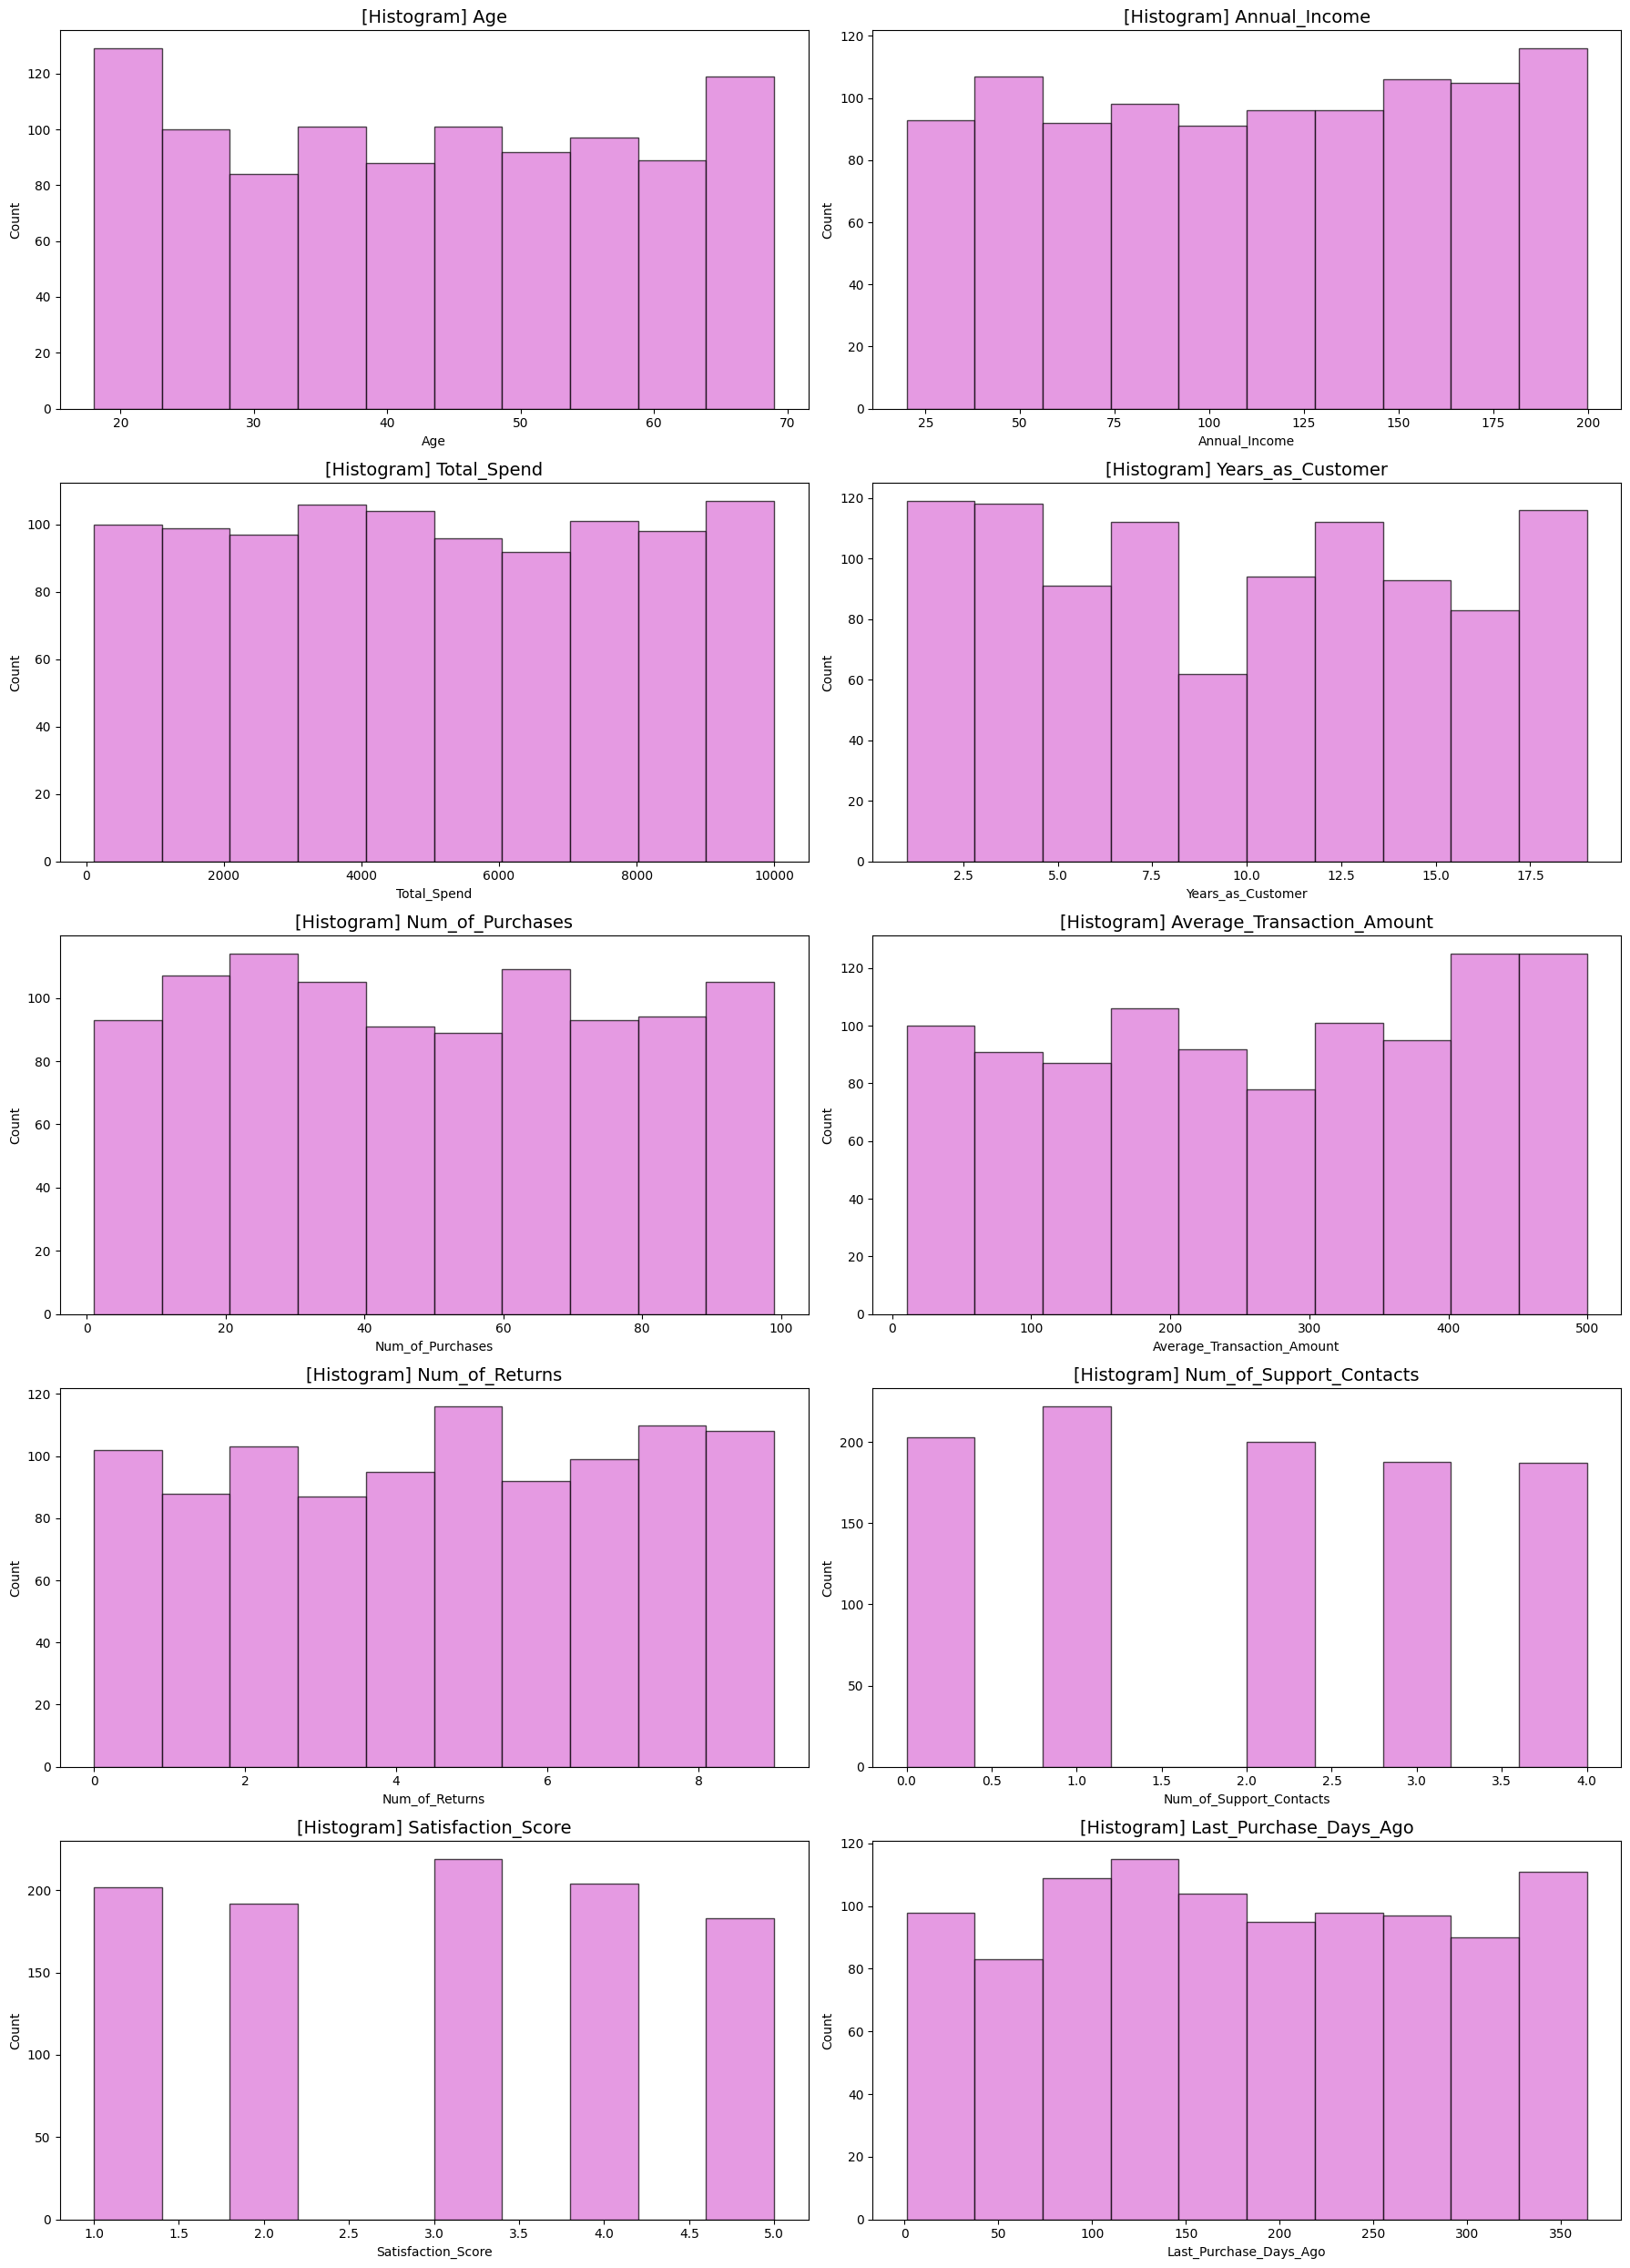

In [13]:
# ÏàòÏπòÌòï Ïª¨Îüº Î™©Î°ù
numeric_cols = [
    'Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
    'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
    'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'
]

# subplot ÏÑ§Ï†ï
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols
plt.figure(figsize=(18, 5 * n_rows))

# Í∞Å Ïª¨ÎüºÏóê ÎåÄÌï¥ ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df[col],  color="orchid", edgecolor="black", alpha=0.7)
    plt.title(f"[Histogram] {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


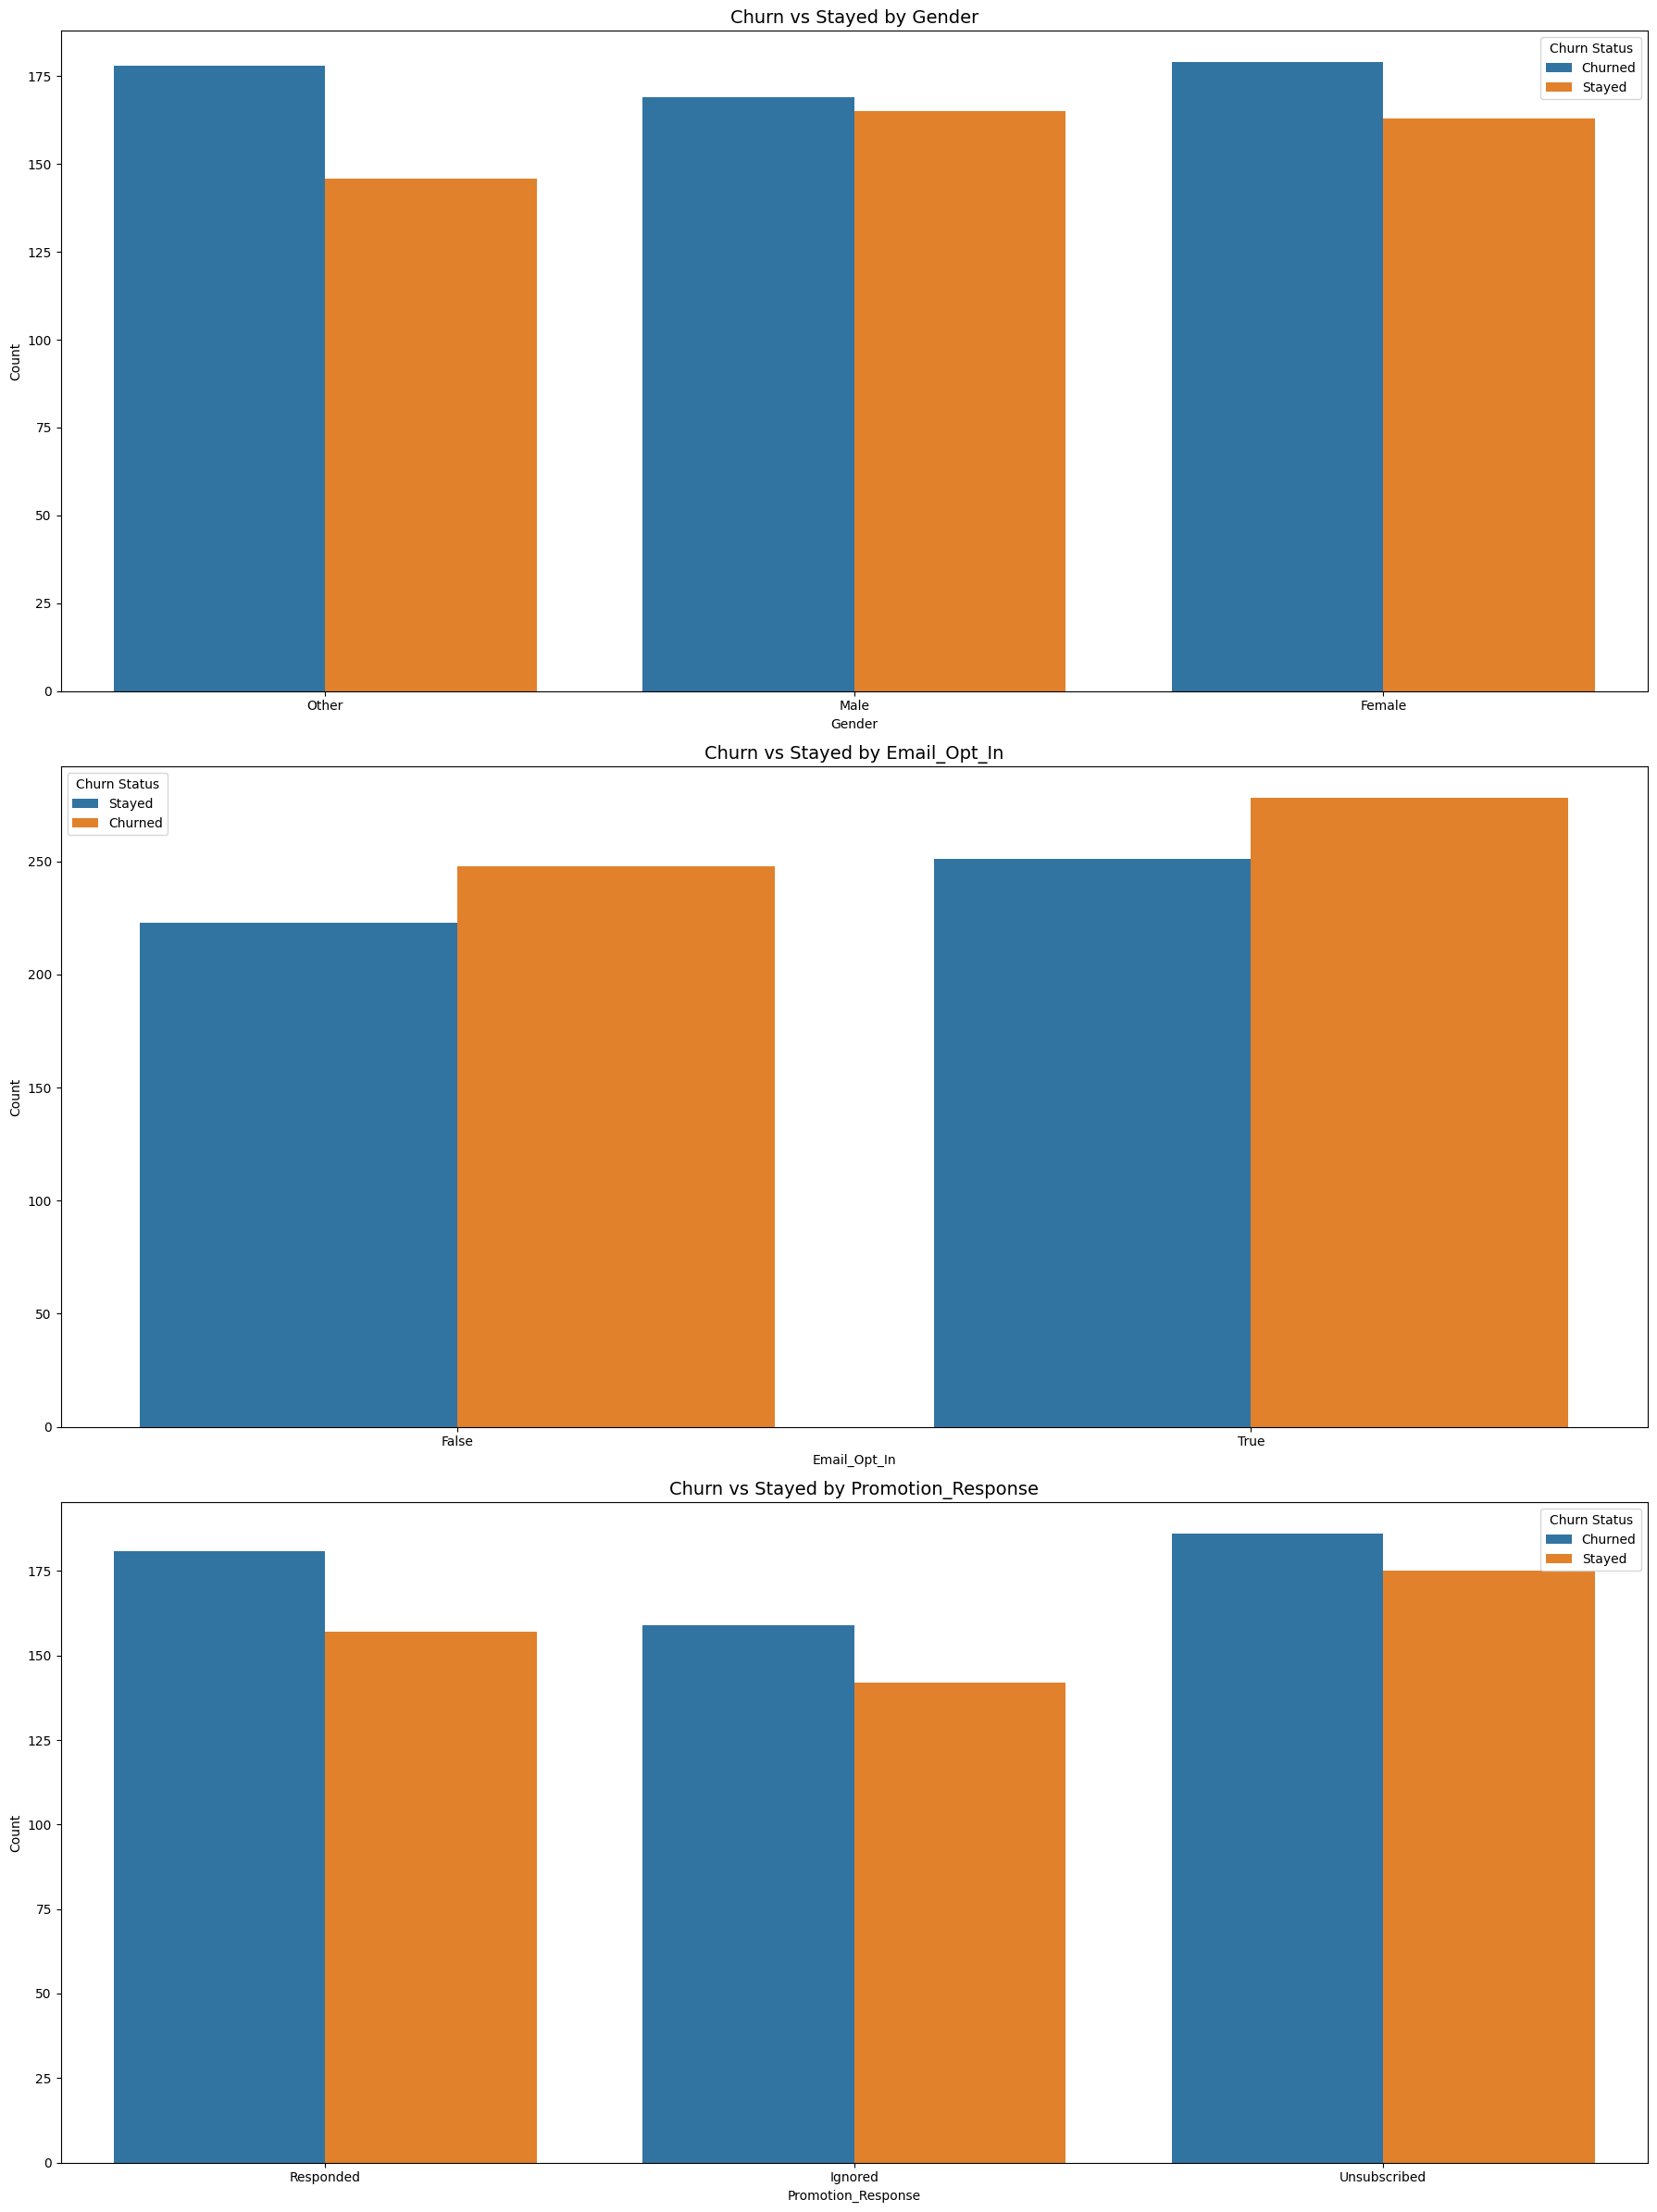

In [14]:
# ‚úÖ Î≤îÏ£ºÌòï Î≥ÄÏàò Î™©Î°ù
categorical_cols = ["Gender", "Email_Opt_In", "Promotion_Response"]

# ‚úÖ Target_ChurnÏùÑ ÏãúÍ∞ÅÌôîÏö© Î¨∏ÏûêÏó¥Î°ú Îß§Ìïë
df["Churn_Status"] = df["Target_Churn"].map({True: "Churned", False: "Stayed"})

# ‚úÖ ÌîåÎ°Ø ÏÑ§Ï†ï Î∞è ÏãúÍ∞ÅÌôî
n_rows = len(categorical_cols)
plt.figure(figsize=(18, 8 * n_rows))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, 1, i + 1)
    sns.countplot(data=df, x=col, hue="Churn_Status")
    plt.title(f"Churn vs Stayed by {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Churn Status")

plt.tight_layout()
plt.show()


In [15]:
df['Target_Churn'].value_counts()

Target_Churn
True     526
False    474
Name: count, dtype: int64

---

# ÏãúÎÇòÎ¶¨Ïò§2

### **ÏãúÎÇòÎ¶¨Ïò§ 2: ÏÜåÎπÑ/Íµ¨Îß§ Ìå®ÌÑ¥ Í∏∞Î∞ò Ïù¥ÌÉà ÏúÑÌóò Î∂ÑÏÑù**

> üõí "Ï†ÅÍ≤å ÏÇ¨Í≥† Ï†ÅÍ≤å Ïì∞Îäî Í≥†Í∞ùÏù¥ Ïù¥ÌÉàÌïòÎäîÍ∞Ä?"
> 
- Î≥ÄÏàò: `Total_Spend`, `Num_of_Purchases`, `Average_Transaction_Amount`
- ÏòàÏÉÅ Ïù∏ÏÇ¨Ïù¥Ìä∏:
    - ÌèâÍ∑† ÏÜåÎπÑÍ∞Ä ÎÇÆÍ≥† Í±∞Îûò ÎπàÎèÑÍ∞Ä ÎÇÆÏùÄ Í≥†Í∞ùÏùÄ Ïù¥ÌÉà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§
    - Î∞òÎåÄÎ°ú VIP Í≥†Í∞ùÏùÄ Îçî Ïò§Îûò Ïú†ÏßÄÎêúÎã§
- ÌôúÏö©: **VIP Î≥¥Ìò∏, Ï†ÄÌôúÎèô Í≥†Í∞ù ÌÉÄÍ≤ü ÌîÑÎ°úÎ™®ÏÖò**

---

## ÏõêÎ≥∏ Î≥ÄÏàò
- Î≥ÄÏàò: `Total_Spend`, `Num_of_Purchases`, `Average_Transaction_Amount`


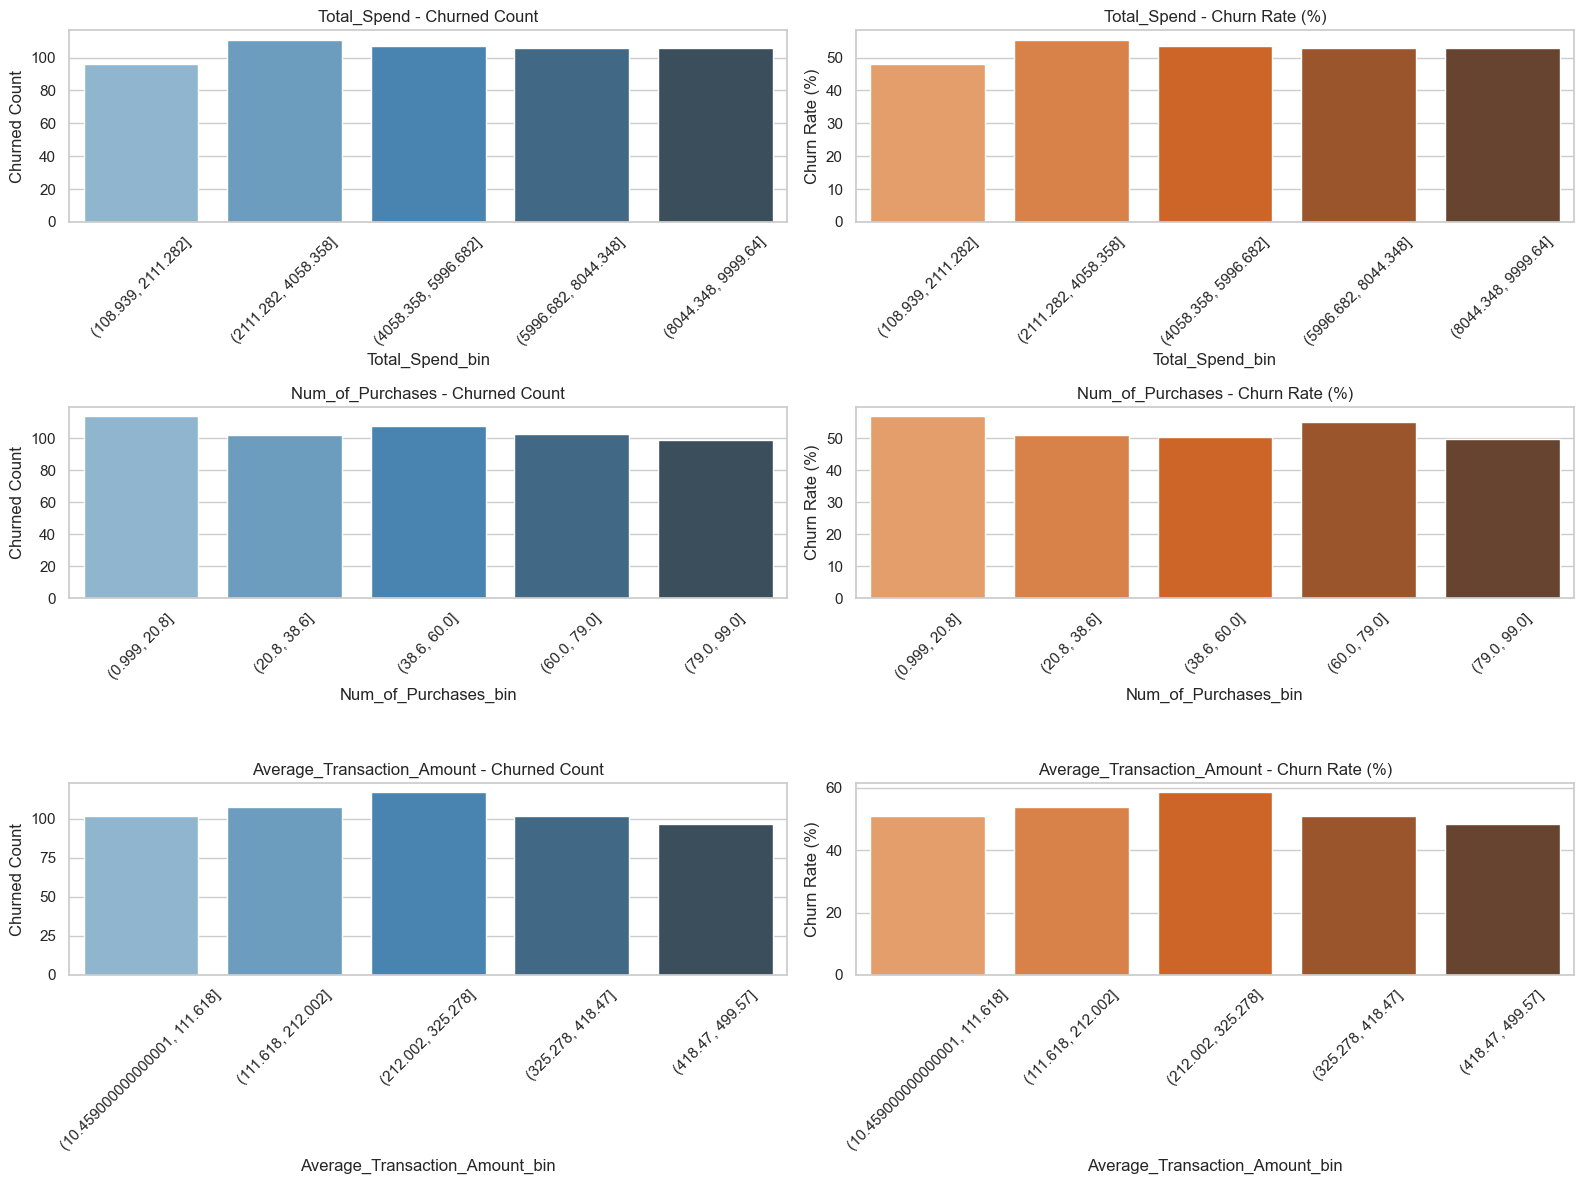

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üìå 2. Î∂ÑÏÑù ÎåÄÏÉÅ Î≥ÄÏàò
original_vars = [
    "Total_Spend",
    "Num_of_Purchases",
    "Average_Transaction_Amount"
]

# ‚úÖ 3. Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏ (Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏù¥Î©¥ Ìå®Ïä§)
for col in original_vars:
    assert pd.api.types.is_numeric_dtype(df[col]), f"{col} is not numeric!"

# üéØ 4. ÌÉÄÍ≤ü Ïù¥ÏßÑÌôî
df["Churn_Label"] = df["Target_Churn"].astype(int)

# ‚úÖ 5. Î∂ÑÏúÑÏàò Íµ¨Í∞Ñ ÎÇòÎàÑÍ≥†, Ïù¥ÌÉà Ïàò Î∞è Ïù¥ÌÉàÎ•† Í≥ÑÏÇ∞
churn_bin_tables = []

for col in original_vars:
    df[f"{col}_bin"] = pd.qcut(df[col], q=5, duplicates='drop')
    bin_stats = df.groupby(f"{col}_bin")["Churn_Label"].agg(
        Count="count",
        Churned="sum",
        Churn_Rate="mean"
    ).reset_index()
    bin_stats["Churn_Rate (%)"] = bin_stats["Churn_Rate"] * 100
    bin_stats["Variable"] = col
    churn_bin_tables.append(bin_stats)

# üßæ 6. Í≤∞Í≥º Î≥ëÌï©
final_churn_bins = pd.concat(churn_bin_tables, ignore_index=True)

# üìä 7. Ïù¥ÌÉà Ïàò & Ïù¥ÌÉàÎ•† ÏãúÍ∞ÅÌôî
sns.set(style="whitegrid")
n_vars = len(original_vars)
fig, axes = plt.subplots(n_vars, 2, figsize=(16, n_vars * 4))

for idx, var in enumerate(original_vars):
    data = final_churn_bins[final_churn_bins["Variable"] == var]

    # Ïù¥ÌÉà Ïàò Í∑∏ÎûòÌîÑ
    sns.barplot(x=data[f"{var}_bin"].astype(str), y=data["Churned"], ax=axes[idx, 0], palette="Blues_d")
    axes[idx, 0].set_title(f"{var} - Churned Count")
    axes[idx, 0].tick_params(axis='x', rotation=45)
    axes[idx, 0].set_ylabel("Churned Count")

    # Ïù¥ÌÉàÎ•† Í∑∏ÎûòÌîÑ
    sns.barplot(x=data[f"{var}_bin"].astype(str), y=data["Churn_Rate (%)"], ax=axes[idx, 1], palette="Oranges_d")
    axes[idx, 1].set_title(f"{var} - Churn Rate (%)")
    axes[idx, 1].tick_params(axis='x', rotation=45)
    axes[idx, 1].set_ylabel("Churn Rate (%)")

plt.tight_layout()
plt.show()


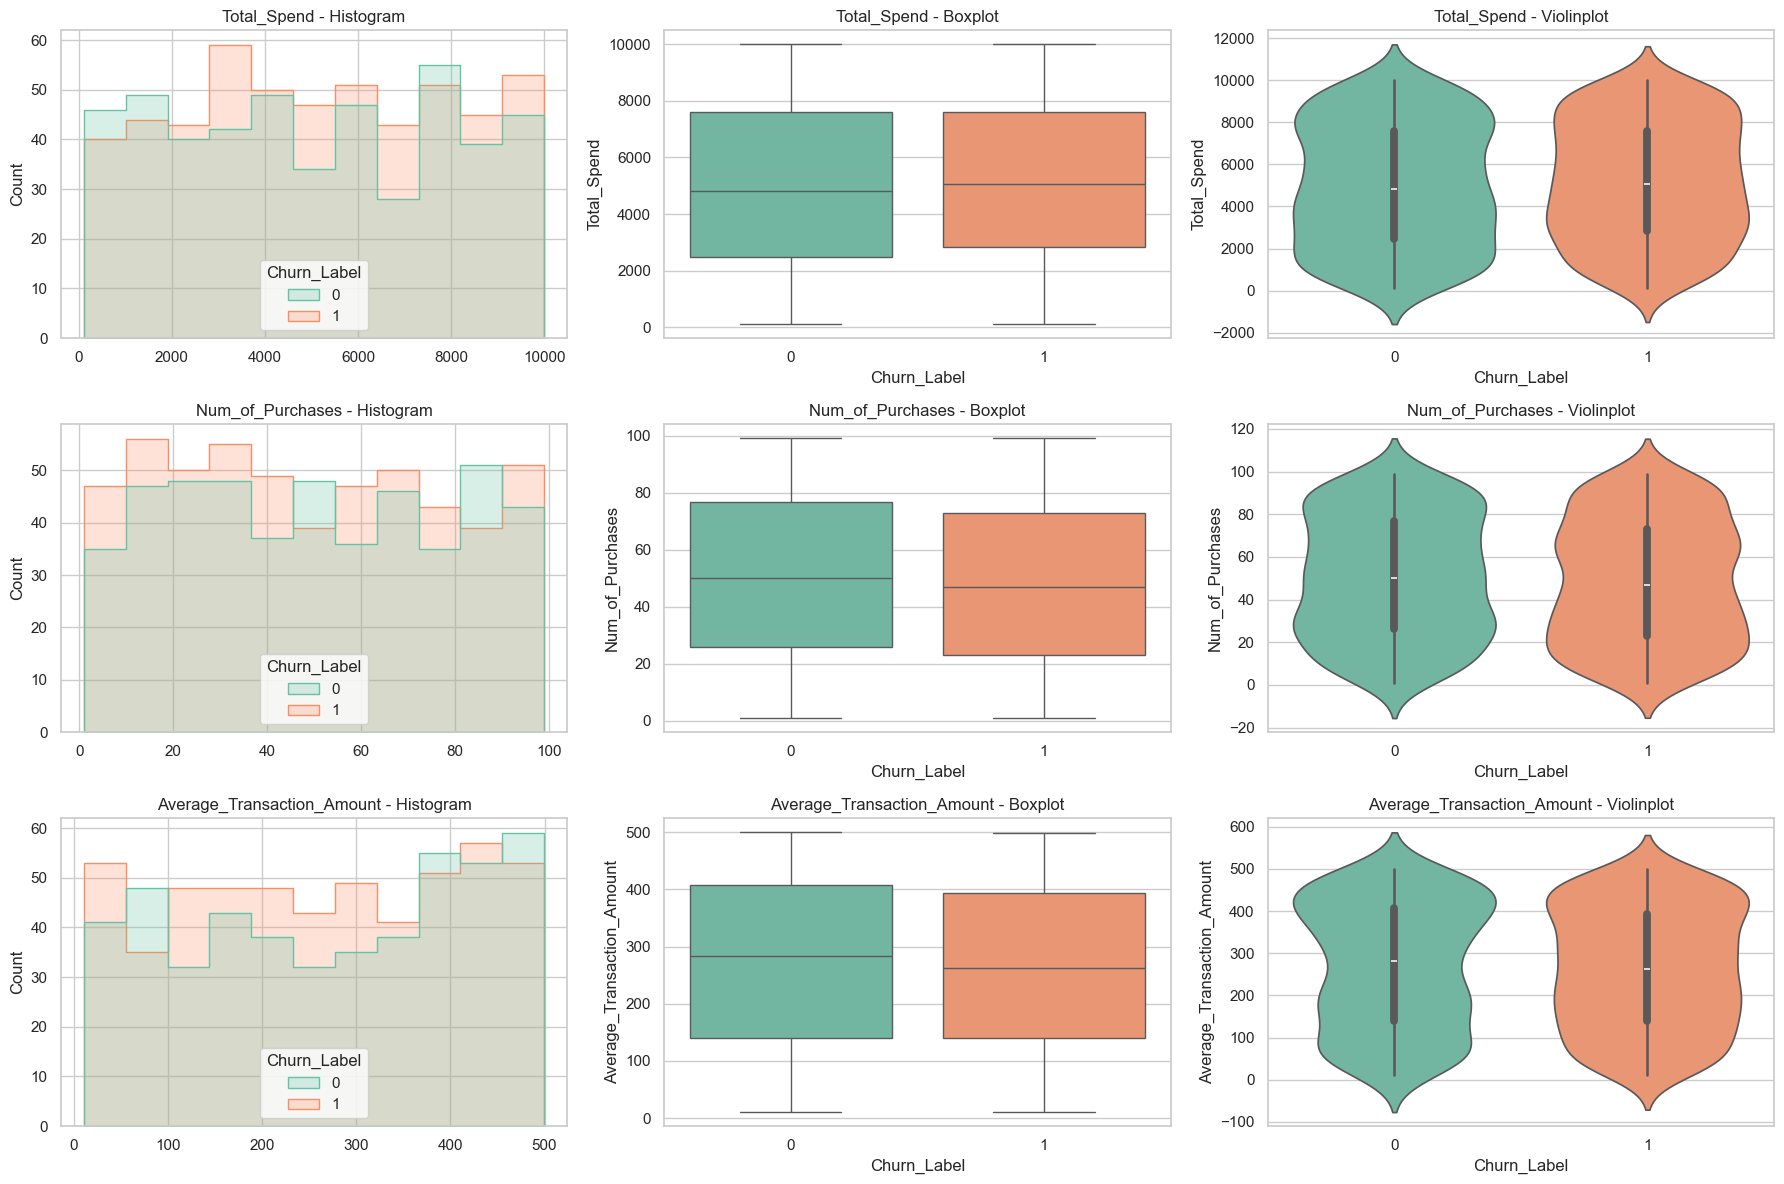

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üéØ 2. Î∂ÑÏÑù ÎåÄÏÉÅ Î≥ÄÏàò Ï†ïÏùò
original_vars = [
    "Total_Spend",
    "Num_of_Purchases",
    "Average_Transaction_Amount"
]

# ‚úÖ 3. Ïà´ÏûêÌòïÏúºÎ°ú ÏïàÏ†ÑÌïòÍ≤å Î≥ÄÌôò (Î¨∏Ïûê Ï†úÍ±∞ ÏóÜÏù¥ ÏßÅÏ†ë ÌòïÎ≥ÄÌôò)
for col in original_vars:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# üéØ 4. ÌÉÄÍ≤ü Î≥ÄÏàò Ïù¥ÏßÑÌôî
df["Churn_Label"] = df["Target_Churn"].astype(int)

# ‚ùå 5. Í≤∞Ï∏°Ïπò Ï†úÍ±∞ (Î≥ÄÌôò ÌõÑ NaN Ï†úÍ±∞)
df_cleaned = df.dropna(subset=original_vars + ["Churn_Label"])

# üìä 6. ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
sns.set(style="whitegrid")
n_rows = len(original_vars)
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))

# üîÅ 7. Î≥ÄÏàòÎ≥Ñ ÏãúÍ∞ÅÌôî
for i, var in enumerate(original_vars):
    # Histogram
    sns.histplot(data=df_cleaned, x=var, hue="Churn_Label", element="step",
                 common_norm=False, palette="Set2", ax=axes[i, 0])
    axes[i, 0].set_title(f"{var} - Histogram")
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel("Count")

    # Boxplot
    sns.boxplot(data=df_cleaned, x="Churn_Label", y=var, palette="Set2", ax=axes[i, 1])
    axes[i, 1].set_title(f"{var} - Boxplot")
    axes[i, 1].set_xlabel("Churn_Label")

    # Violinplot
    sns.violinplot(data=df_cleaned, x="Churn_Label", y=var, palette="Set2", ax=axes[i, 2])
    axes[i, 2].set_title(f"{var} - Violinplot")
    axes[i, 2].set_xlabel("Churn_Label")

plt.tight_layout()
plt.show()


Ï¢ãÏïÑ, ÏßÄÍ∏àÍπåÏßÄ Ïö∞Î¶¨Í∞Ä ÎßåÎì† ÏãúÍ∞ÅÌôî (Íµ¨Í∞Ñ Í∏∞Î∞ò + Ï†ÑÏ≤¥ Î∂ÑÌè¨ Í∏∞Î∞ò)Î•º Î∞îÌÉïÏúºÎ°ú  
üîç **Í∞Å Î≥ÄÏàòÏôÄ Ïù¥ÌÉà Ïó¨Î∂Ä Í∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Î∂ÑÏÑù**ÌïòÍ≥†  
üìå **Ïù¥ÌÉàÎ•†, Ïù¥ÌÉà Ïàò, Ï†ÑÏ≤¥ Î∂ÑÌè¨ÏóêÏÑúÏùò Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÏÉÅÏÑ∏ÌïòÍ≤å Ï†ïÎ¶¨**Ìï¥Ï§ÑÍ≤å.

---

# üìä ÏõêÎ≥∏ Î≥ÄÏàòÎ≥Ñ Ïù¥ÌÉà Î∂ÑÏÑù Ïù∏ÏÇ¨Ïù¥Ìä∏ Ï†ïÎ¶¨

> ÎåÄÏÉÅ Î≥ÄÏàò:  
> ‚úÖ `Total_Spend`  
> ‚úÖ `Num_of_Purchases`  
> ‚úÖ `Average_Transaction_Amount`

---

## 1Ô∏è‚É£ **Total_Spend (Ï¥ù ÏßÄÏ∂ú)**

### üìà Íµ¨Í∞Ñ Í∏∞Î∞ò Î∂ÑÏÑù (qcut Î∂ÑÏúÑÏàò Î∂ÑÌï†)
- **Ï§ëÍ∞Ñ Íµ¨Í∞Ñ(ÏïΩ \$4000~\$7000)Ïùò Ïù¥ÌÉàÎ•†Ïù¥ Í∞ÄÏû• ÎÜíÏùå**
- ÏÉÅÏúÑ ÏßÄÏ∂ú Íµ¨Í∞ÑÏùÄ Ïù¥ÌÉàÎ•†Ïù¥ Ï°∞Í∏à ÎÇÆÏïÑÏßÄÎäî Í≤ΩÌñ•
- ÌïòÏúÑ ÏßÄÏ∂ú Íµ¨Í∞Ñ(Ï†ÄÏÜåÎπÑ Í≥†Í∞ù)ÏùÄ ÏùòÏô∏Î°ú Ïù¥ÌÉàÎ•†Ïù¥ ÎÇÆÏùå

### üìä Ïù¥ÌÉà Ïàò Í∏∞Î∞ò Î∂ÑÏÑù
- **Ïù¥ÌÉà Í≥†Í∞ù ÏàòÎäî Ï§ëÍ∞Ñ ÏßÄÏ∂ú Íµ¨Í∞ÑÏóê ÏßëÏ§ëÎê®**
- Ïù¥Îäî Ìï¥Îãπ Íµ¨Í∞ÑÏóê Í≥†Í∞ùÏù¥ ÎßéÏù¥ Î∂ÑÌè¨Ìï¥ ÏûàÎã§Îäî ÎúªÎèÑ ÎÇ¥Ìè¨

### üß† Ï†ÑÏ≤¥ Î∂ÑÌè¨ Í∏∞Î∞ò Ïù∏ÏÇ¨Ïù¥Ìä∏
- `Histogram`: ÏûîÎ•ò Í≥†Í∞ùÏùÄ ÏßÄÏ∂úÏù¥ ÎÇÆÍ±∞ÎÇò Ï§ëÍ∞ÑÏóê Î™∞Î†§ ÏûàÏùå
- `Box/Violin`: Ïù¥ÌÉà Í≥†Í∞ùÏùÄ Ï§ëÏïôÍ∞íÏù¥ ÎÜíÍ≥†, ÏßÄÏ∂ú Î∂ÑÌè¨Í∞Ä Îçî ÎÑìÏùå
- ‚Üí **ÎßéÏù¥ Ïì¥Îã§Í≥† Î¨¥Ï°∞Í±¥ Ïú†ÏßÄÎêòÏßÄ ÏïäÏùå**  
  ‚Üí **Ï§ëÍ∞Ñ ÏßÄÏ∂ú Íµ¨Í∞ÑÏùÄ Î¶¨ÌÖêÏÖò ÎåÄÏÉÅ ÌïµÏã¨**

---

## 2Ô∏è‚É£ **Num_of_Purchases (Íµ¨Îß§ ÌöüÏàò)**

### üìà Íµ¨Í∞Ñ Í∏∞Î∞ò Î∂ÑÏÑù
- **Íµ¨Îß§ ÌöüÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù Ïù¥ÌÉàÎ•†Ïù¥ ÎààÏóê ÎùÑÍ≤å ÎÇÆÏïÑÏßê**
- ÌïòÏúÑ 20~40% Íµ¨Í∞ÑÏóêÏÑú Ïù¥ÌÉàÎ•† Í∏âÎì±

### üìä Ïù¥ÌÉà Ïàò Í∏∞Î∞ò Î∂ÑÏÑù
- **Íµ¨Îß§ ÌöüÏàòÍ∞Ä Ï†ÅÏùÄ Í≥†Í∞ùÍµ∞ÏóêÏÑú Ïù¥ÌÉà ÏàòÍ∞Ä ÏßëÏ§ëÎê®**
- ÏÉÅÏúÑ Íµ¨Îß§ Íµ¨Í∞ÑÏùÄ Ïù¥ÌÉà Í≥†Í∞ù Ïàò ÏûêÏ≤¥Í∞Ä Ï†ÅÏùå

### üß† Ï†ÑÏ≤¥ Î∂ÑÌè¨ Í∏∞Î∞ò Ïù∏ÏÇ¨Ïù¥Ìä∏
- `Boxplot`/`Violinplot`: Ïù¥ÌÉà Í≥†Í∞ùÏùÄ **Íµ¨Îß§ ÌöüÏàò Î∂ÑÌè¨Í∞Ä Ï¢ÅÍ≥† Ï§ëÏïôÍ∞í ÎÇÆÏùå**
- ÏûîÎ•ò Í≥†Í∞ùÏùÄ ÎÑìÏùÄ Î∂ÑÌè¨ÏôÄ Îçî ÎÜíÏùÄ Ï§ëÏïôÍ∞í
- ‚Üí **Íµ¨Îß§ ÎπàÎèÑÎäî Í∞ÄÏû• Í∞ïÎ†•Ìïú Î¶¨ÌÖêÏÖò ÏòàÏ∏° ÏöîÏù∏ Ï§ë ÌïòÎÇò**  
- ‚Üí Í≥†Í∞ù Ï∂©ÏÑ±ÎèÑÏôÄ ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Ïó∞Í≤∞ÎêòÎäî ÌñâÎèô Î≥ÄÏàò

---

## 3Ô∏è‚É£ **Average_Transaction_Amount (ÌèâÍ∑† Í±∞Îûò Í∏àÏï°)**

### üìà Íµ¨Í∞Ñ Í∏∞Î∞ò Î∂ÑÏÑù
- Ïù¥ÌÉàÎ•†ÏùÄ Íµ¨Í∞ÑÎßàÎã§ **ÎöúÎ†∑Ìïú Ï∂îÏÑ∏ ÏóÜÏù¥ ÏôÑÎßåÌïú Í≥°ÏÑ†**
- **Ï§ëÍ∞Ñ Îã®Í∞Ä Íµ¨Í∞ÑÏóêÏÑú Îã§ÏÜå ÎÜíÏùÄ Ïù¥ÌÉàÎ•†**

### üìä Ïù¥ÌÉà Ïàò Í∏∞Î∞ò Î∂ÑÏÑù
- Ïù¥ÌÉà ÏàòÎäî **Ï§ëÍ∞Ñ~Í≥†Ïï° Îã®Í∞Ä Í≥†Í∞ùÏóêÏÑú Îã§Ïàò Î∞úÏÉù**
- Í≥†Ïï° Îã®Í∞Ä Í≥†Í∞ùÏùÄ ÏàòÎäî Ï†ÅÏßÄÎßå Ïù¥ÌÉàÌï† Í≤ΩÏö∞ ÏÜêÌï¥Í∞Ä ÌÅº

### üß† Ï†ÑÏ≤¥ Î∂ÑÌè¨ Í∏∞Î∞ò Ïù∏ÏÇ¨Ïù¥Ìä∏
- `Histogram`: Ïù¥ÌÉà Í≥†Í∞ùÏùÄ Îã®Í∞ÄÍ∞Ä ÎÜíÏùÄ Ï™ΩÏóêÎèÑ Î∂ÑÌè¨Ìï®
- `Box/Violin`: Ï§ëÏïôÍ∞íÏóêÎäî ÌÅ∞ Ï∞®Ïù¥ ÏóÜÏùå, Îã§Îßå Î∂ÑÏÇ∞ÏùÄ ÏûîÎ•ò Í≥†Í∞ùÏù¥ Îçî ÌÅº
- ‚Üí **Îã®Í∞ÄÎ≥¥Îã§ Íµ¨Îß§ ÎπàÎèÑ(Num_of_Purchases)Í∞Ä Îçî Í≤∞Ï†ïÏ†ÅÏù∏ Î≥ÄÏàò**

---

# üîç Ï¢ÖÌï© Ìï¥ÏÑù

| Î≥ÄÏàòÎ™Ö | Ïù¥ÌÉàÎ•† ÌäπÏßï | Ïù¥ÌÉà Ïàò Î∂ÑÌè¨ | Î∂ÑÌè¨ Î∂ÑÏÑù Ìï¥ÏÑù | Ïã§Î¨¥ Ïù∏ÏÇ¨Ïù¥Ìä∏ |
|--------|-------------|----------------|----------------|----------------|
| **Total_Spend** | Ï§ëÍ∞Ñ ÏßÄÏ∂ú Íµ¨Í∞ÑÏóêÏÑú Í∞ÄÏû• ÎÜíÏùå | Ïù¥ÌÉà Í≥†Í∞ù Ïàò ÏßëÏ§ë | Ïù¥ÌÉà Í≥†Í∞ùÏù¥ Îçî ÎÑìÏùÄ ÏßÄÏ∂ú Î∂ÑÌè¨ | **Ï§ëÍ∞Ñ ÏßÄÏ∂úÏûê Í¥ÄÎ¶¨ ÌïÑÏöî** |
| **Num_of_Purchases** | Íµ¨Îß§ ÎßéÏùÑÏàòÎ°ù Ïù¥ÌÉàÎ•†‚Üì | ÌïòÏúÑ Íµ¨Í∞ÑÏóê Ïù¥ÌÉà ÏßëÏ§ë | Ïù¥ÌÉà Í≥†Í∞ùÏùò Íµ¨Îß§ ÌöüÏàò ÎÇÆÏùå | **Íµ¨Îß§ ÎπàÎèÑ = ÌïµÏã¨ ÏòàÏ∏° Î≥ÄÏàò** |
| **Avg_Transaction_Amount** | ÌÅ∞ Ï∞®Ïù¥ ÏóÜÏùå | Ï§ëÍ≥†Ïï° Íµ¨Í∞ÑÏóê Î™∞Î¶º | Ï∞®Ïù¥Îäî ÏïΩÌïòÏßÄÎßå Î∂ÑÌè¨ Ìè≠ Ï∞®Ïù¥ | **Îã®Í∞ÄÎ≥¥Îã® ÌöüÏàò Ï§ëÏã¨ Ï†ÑÎûµ Ïú†Ìö®** |

---

# üß† Ïã§Î¨¥Ï†Å Ï†ÑÎûµ Ï†úÏïà

| Í≥†Í∞ùÍµ∞ Ï°∞Í±¥ | Ï†úÏïà Ï†ÑÎûµ |
|-------------|------------|
| **Ï§ëÍ∞Ñ ÏßÄÏ∂ú & Íµ¨Îß§ Ï†ÅÏùå** | üî∏ Î¶¨ÎßàÏù∏Îìú Ï∫†ÌéòÏù∏, Ï≤¥ÌóòÍ∂å Ï†úÍ≥µ |
| **Íµ¨Îß§ Ïû¶Í≥† ÌèâÍ∑† Îã®Í∞Ä ÎÇÆÏùå** | ‚úÖ VIP Îì±Í∏â Î∂ÄÏó¨, Ï∂îÏ≤ú Î¶¨ÏõåÎìú |
| **Í≥†Îã®Í∞Ä Îã®Î∞ú Í≥†Í∞ù** | üî∫ ÌîÑÎ¶¨ÎØ∏ÏóÑ Ïú†ÏßÄ Ï†ÑÎûµ Í∞ïÌôî |
| **ÌïòÏúÑ Íµ¨Îß§ Íµ¨Í∞Ñ & Ïù¥ÌÉà ÏúÑÌóòÍµ∞** | üì¢ Ïã†Í∑ú Í≥†Í∞ù Ïò®Î≥¥Îî© Í∞ïÌôî, ÎßåÏ°±ÎèÑ Ï°∞ÏÇ¨ Ïú†ÎèÑ |

---

Ïù¥Ï†ú Ïù¥ ÌùêÎ¶ÑÏúºÎ°ú  
- üìã Markdown Î≥¥Í≥†ÏÑúÏö© Ï†ïÎ¶¨  
- üìà ÌååÏÉù Î≥ÄÏàò Î≤ÑÏ†Ñ Î∂ÑÏÑù  
- üéØ Í≥†Í∞ù ÏÑ∏Í∑∏Î®ºÌä∏ Ï†ïÏùò/Ï†ÑÎûµ ÏÑ§Í≥Ñ  

Ï§ë Ïñ¥ÎîîÎ°ú Ïù¥Ïñ¥Í∞àÍπå?

Ï¢ãÏïÑ, Í∑∏Îüº ÏßÄÍ∏àÍπåÏßÄ Î∂ÑÏÑùÌïú **ÏõêÎ≥∏ Î≥ÄÏàò 3Í∞ú (`Total_Spend`, `Num_of_Purchases`, `Average_Transaction_Amount`)**Ïóê ÎåÄÌï¥  
Í∞ÅÍ∞ÅÏùÑ Í∏∞Ï§ÄÏúºÎ°ú:

> üîç **Ïù¥ÌÉà Ïàò Í∏∞Î∞ò vs Ïù¥ÌÉàÎ•† Í∏∞Î∞ò Î∂ÑÏÑù**  
> üîÆ **ÏòàÏÉÅ Ïù∏ÏÇ¨Ïù¥Ìä∏ vs Ïã§Ï†ú Í≤∞Í≥º**  
> üí° **ÌïµÏã¨ Ìï¥ÏÑù**  

ÏùÑ **Î≥ÄÏàòÎ≥ÑÎ°ú ÎÇòÎà† Ï†ïÎ¶¨**Ìï¥Ï§ÑÍ≤å.

---

# üìä Î≥ÄÏàòÎ≥Ñ: Ïù¥ÌÉà Ïàò vs Ïù¥ÌÉàÎ•† Î∂ÑÏÑù ÎπÑÍµêÌëú

## 1Ô∏è‚É£ `Total_Spend` (Ï¥ù ÏßÄÏ∂ú)

| Î∂ÑÏÑù Í∏∞Ï§Ä | üîÆ ÏòàÏÉÅ Ïù∏ÏÇ¨Ïù¥Ìä∏ | ‚úÖ Ïã§Ï†ú Í≤∞Í≥º | üí° Ìï¥ÏÑù |
|------------|------------------|----------------|---------|
| **Ïù¥ÌÉà Ïàò (Churned Count)** | Í≥†ÏßÄÏ∂ú Í≥†Í∞ùÏù¥ Ïù¥ÌÉàÌïòÎ©¥ ÏÜêÌï¥Í∞Ä ÌÅ¨ÎØÄÎ°ú Ïù¥ÌÉà ÏàòÍ∞Ä ÎßéÏùÑ Í≤ÉÏù¥Îã§. | ‚ùå Ïù¥ÌÉà ÏàòÎäî **Ï§ëÍ∞Ñ ÏßÄÏ∂ú Íµ¨Í∞ÑÏóê ÏßëÏ§ë**Îê® | Í≥†Í∞ù ÏàòÍ∞Ä ÎßéÏùÄ **Ï§ëÍ∞Ñ ÏÜåÎπÑÏ∏µ**ÏóêÏÑú Ïù¥ÌÉàÏù¥ ÎßéÏïÑ Î≥¥ÏûÑ |
| **Ïù¥ÌÉàÎ•† (Churn Rate)** | Í≥†ÏßÄÏ∂ú Í≥†Í∞ùÏùÄ ÎßåÏ°±ÎèÑÍ∞Ä ÎÜíÍ≥† Ïù¥ÌÉàÎ•†Ïù¥ ÎÇÆÏùÑ Í≤ÉÏù¥Îã§. | üîÑ Ïù¥ÌÉàÎ•†ÏùÄ **Ï§ëÍ∞Ñ ÏßÄÏ∂ú Íµ¨Í∞ÑÏóêÏÑú Í∞ÄÏû• ÎÜíÏùå**<br>Í≥†ÏßÄÏ∂ú Íµ¨Í∞ÑÏùÄ Ïò§ÌûàÎ†§ ÎÇÆÏùå | **ÎßéÏù¥ Ïì¥Îã§Í≥† ÏûîÎ•òÌïòÎäî Í±¥ ÏïÑÎãò**. Ï§ëÍ∞Ñ ÏßÄÏ∂úÏûê Í¥ÄÎ¶¨ ÌïÑÏöî |

---

## 2Ô∏è‚É£ `Num_of_Purchases` (Íµ¨Îß§ ÌöüÏàò)

| Î∂ÑÏÑù Í∏∞Ï§Ä | üîÆ ÏòàÏÉÅ Ïù∏ÏÇ¨Ïù¥Ìä∏ | ‚úÖ Ïã§Ï†ú Í≤∞Í≥º | üí° Ìï¥ÏÑù |
|------------|------------------|----------------|---------|
| **Ïù¥ÌÉà Ïàò (Churned Count)** | Íµ¨Îß§Î•º ÎßéÏù¥ Ìïú Í≥†Í∞ùÏù¥ ÎßéÏúºÎØÄÎ°ú Ïù¥ÌÉà ÏàòÍ∞Ä ÎßéÏùÑ Í≤É | ‚ùå Ïù¥ÌÉà ÏàòÎäî **ÌïòÏúÑ Íµ¨Îß§ Íµ¨Í∞Ñ**Ïóê ÏßëÏ§ëÎê® | **Íµ¨Îß§ Ï†ÅÏùÄ Í≥†Í∞ù ÏàòÍ∞Ä ÎßéÏïòÍ≥†**, Í∑∏ Ï§ë Îã§ÏàòÍ∞Ä Ïù¥ÌÉà |
| **Ïù¥ÌÉàÎ•† (Churn Rate)** | Íµ¨Îß§ ÎßéÏù¥ Ìïú Í≥†Í∞ùÏùÄ Ï∂©ÏÑ±ÎèÑÍ∞Ä ÎÜíÏïÑ Ïù¥ÌÉàÎ•†Ïù¥ ÎÇÆÏùÑ Í≤ÉÏù¥Îã§ | ‚úÖ **Íµ¨Îß§ Ï†ÅÏùÄ Í≥†Í∞ùÏùºÏàòÎ°ù Ïù¥ÌÉàÎ•† Í∏âÎì±**<br>ÏÉÅÏúÑ Íµ¨Í∞ÑÏùÄ Í±∞Ïùò Ïù¥ÌÉà ÏóÜÏùå | **Íµ¨Îß§ ÌöüÏàòÎäî Í∞ïÎ†•Ìïú Î¶¨ÌÖêÏÖò ÏßÄÌëú**. Ïã†Í∑ú/Ï†ÄÎπàÎèÑ Í≥†Í∞ùÏùÄ Í≥†ÏúÑÌóòÍµ∞ |

---

## 3Ô∏è‚É£ `Average_Transaction_Amount` (ÌèâÍ∑† Íµ¨Îß§ Í∏àÏï°)

| Î∂ÑÏÑù Í∏∞Ï§Ä | üîÆ ÏòàÏÉÅ Ïù∏ÏÇ¨Ïù¥Ìä∏ | ‚úÖ Ïã§Ï†ú Í≤∞Í≥º | üí° Ìï¥ÏÑù |
|------------|------------------|----------------|---------|
| **Ïù¥ÌÉà Ïàò (Churned Count)** | Í≥†Îã®Í∞Ä ÏÜåÎπÑÏûê Ïù¥ÌÉà Ïãú ÏÜêÌï¥ ÌÅ¨ÎØÄÎ°ú ÏàòÍ∞Ä ÎßéÏùÑ Í≤ÉÏù¥Îã§ | üîÑ Ïù¥ÌÉà ÏàòÎäî **Ï§ëÍ∞Ñ~Í≥†Îã®Í∞Ä Íµ¨Í∞ÑÏóê Îã§Ïàò Ï°¥Ïû¨** | Ïù¥ÌÉà ÏàòÎäî Í≥†Í∞ù Î∂ÑÌè¨ ÏòÅÌñ• ÌÅº. Îã®Í∞Ä ÎÜíÎã§Í≥† Î¨¥Ï°∞Í±¥ Ïù¥ÌÉà ÎßéÏùÄ Í±¥ ÏïÑÎãò |
| **Ïù¥ÌÉàÎ•† (Churn Rate)** | Í≥†Îã®Í∞Ä Í≥†Í∞ùÏù¥ Îçî ÎßåÏ°±ÌïòÍ≥† Ïù¥ÌÉàÎ•† ÎÇÆÏùÑ Í≤ÉÏù¥Îã§ | üîÑ Ïù¥ÌÉàÎ•†ÏùÄ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú **ÌÅ∞ Ï∞®Ïù¥ ÏóÜÏùå** | **Îã®Í∞ÄÎ≥¥Îã® Íµ¨Îß§ ÎπàÎèÑ**Í∞Ä Ìõ®Ïî¨ ÏòÅÌñ•Î†• ÏûàÏùå. ÏòàÏ∏°Î†• ÏïΩÌïú Î≥ÄÏàò |

---

# üß† Ï¢ÖÌï© Ïù∏ÏÇ¨Ïù¥Ìä∏ ÏöîÏïΩ

| Î≥ÄÏàò | Ïù¥ÌÉà ÏàòÎ°ú Î≥¥Î©¥ | Ïù¥ÌÉàÎ•†Î°ú Î≥¥Î©¥ | ÌïµÏã¨ Ïù∏ÏÇ¨Ïù¥Ìä∏ |
|-------|------------------|----------------|----------------|
| **Total_Spend** | Ï§ëÍ∞Ñ Íµ¨Í∞ÑÏóê Ïù¥ÌÉà ÏßëÏ§ë | Ï§ëÍ∞Ñ Íµ¨Í∞Ñ Ïù¥ÌÉàÎ•† Í∞ÄÏû• ÎÜíÏùå | **Ï§ëÍ∞Ñ ÏßÄÏ∂úÏûê Î¶¨Ïä§ÌÅ¨ Í¥ÄÎ¶¨ ÌïÑÏöî** |
| **Num_of_Purchases** | ÌïòÏúÑ Íµ¨Í∞ÑÏóê Ïù¥ÌÉà Ïàò ÏßëÏ§ë | ÌïòÏúÑ Íµ¨Í∞Ñ Ïù¥ÌÉàÎ•† Í∏âÎì± | **ÎπàÎèÑ ÎÇÆÏùÄ Í≥†Í∞ù = Í≥†ÏúÑÌóòÍµ∞** |
| **Avg_Transaction_Amount** | Ï§ëÍ∞Ñ~Í≥†Îã®Í∞ÄÏóêÏÑú Ïù¥ÌÉà Îã§Ïàò | Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÌÅ∞ Ï∞®Ïù¥ ÏóÜÏùå | **Îã®Í∞ÄÎ≥¥Îã§Îäî ÌöüÏàòÍ∞Ä Îçî Ï§ëÏöî** |

---

## ‚úÖ Ï†ÑÎûµ ÏöîÏïΩ

| Í≥†Í∞ùÍµ∞ Ï°∞Í±¥ | Ï∂îÏ≤ú Ï†ÑÎûµ |
|--------------|--------------|
| Ï§ëÍ∞Ñ ÏßÄÏ∂ú & ÎÇÆÏùÄ Íµ¨Îß§ ÎπàÎèÑ | üî∏ Î¶¨ÎßàÏù∏Îìú Î©îÏãúÏßÄ, ÌîÑÎ°úÎ™®ÏÖò Ïú†ÎèÑ |
| Í≥†ÏßÄÏ∂ú & Í≥†ÎπàÎèÑ Í≥†Í∞ù | ‚úÖ VIP Ïú†ÏßÄ ÌîÑÎ°úÍ∑∏Îû® |
| Ï†ÄÏßÄÏ∂ú & Î∞òÎ≥µ Íµ¨Îß§ | üíé Ï∂©ÏÑ± Îì±Í∏â Í∞ïÌôî, Ï∂îÏ≤ú Ïù¥Î≤§Ìä∏ |
| Í≥†Îã®Í∞Ä Îã®Î∞ú Í≥†Í∞ù | ‚ö† ÏºÄÏñ¥ Í∞ïÌôî, CS ÌíàÏßà Í∞úÏÑ† |

---

ÌïÑÏöîÌïòÎã§Î©¥ Ïù¥ ÎÇ¥Ïö©ÏùÑ  
- üìÑ Markdown Î¨∏ÏÑúÎ°ú Î≥ÄÌôò  
- üìä Î∞úÌëúÏö© ÌÖåÏù¥Î∏î or Ïä¨ÎùºÏù¥Îìú Íµ¨ÏÑ±  
- üîÅ ÌååÏÉù Î≥ÄÏàòÎ°ú Í∞ôÏùÄ Íµ¨Ï°∞Î°ú Ï†ïÎ¶¨  

Ìï¥Ï§Ñ ÏàòÎèÑ ÏûàÏñ¥.  
Ïñ¥ÎñªÍ≤å Ïù¥Ïñ¥Í∞ÄÎ≥ºÍπå? üòé